Gus Marquez project Practice ONE

1 Stock Price Prediction with LSTM Neural Network

2 Online Payments Fraud Detection

3 Future Sales Prediction

4 Waiter Tips Analysis & Prediction

5 Stock Price Prediction  

6 Linear Regression Model

7 Logistic Regression Model

8 K-Means Algorithm

9 Support Vector Machines

10 Decision Trees

11 Neural Networks

12 Flipkart Reviews Sentiment Analysis

13 Cryptocurrency Price Prediction for the next 30 days

14 Article Recommendation System

15 Netflix Stock Price Prediction

16 Time Series Analysis 

1

Stock Price Prediction with LSTM

Using LSTM is one of the best machine learning approaches for time series forecasting. LSTMs are recurrent neural networks designed to remember data for a longer period. So, whenever you are working on a problem where your neural network fails to memorize data, you can use LSTM neural network. You can read more about LSTMs here.

Now in this section, I will take you through the task of Stock price prediction with LSTM using the Python programming language. I will start this task by importing all the necessary Python libraries and collecting the latest stock price data of Apple:


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 15.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3442,2023-03-10,150.210007,150.940002,147.610001,148.500000,148.500000,68524400
3443,2023-03-13,147.809998,153.139999,147.699997,150.470001,150.470001,84457100
3444,2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900
3445,2023-03-15,151.190002,153.250000,149.919998,152.990005,152.990005,77167900
3446,2023-03-16,152.160004,156.460007,151.639999,155.850006,155.850006,76254400


In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [ ]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999930
Low          0.999874
High         0.999872
Open         0.999722
Volume      -0.518579
Name: Close, dtype: float64


In [ ]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
2757/2757 [==============================] - 22s 6ms/step - loss: 236.5322
Epoch 2/30
2757/2757 [==============================] - 10s 4ms/step - loss: 10.5937
Epoch 3/30
2757/2757 [==============================] - 10s 4ms/step - loss: 7.3781
Epoch 4/30
2757/2757 [==============================] - 10s 4ms/step - loss: 11.5574
Epoch 5/30
2757/2757 [==============================] - 10s 4ms/step - loss: 7.3641
Epoch 6/30
2757/2757 [==============================] - 10s 3ms/step - loss: 8.4235
Epoch 7/30
2757/2757 [==============================] - 10s 4ms/step - loss: 8.4275
Epoch 8/30
2757/2757 [==============================] - 10s 4ms/step - loss: 5.5865
Epoch 9/30
2757/2757 [==============================] - 10s 4ms/step - loss: 9.3653
Epoch 10/30
2757/2757 [==============================] - 11s 4ms/step - loss: 6.2335
Epoch 11/30
2757/2757 [==============================] - 11s 4ms/step - loss: 6.6284
Epoch 12/30
2757/2757 [==============================] - 10s 4ms/step 

In [ ]:
import numpy as np
#features = [Open, High, Low, Adj Close, Volume]
features = np.array([[177.089996, 180.419998, 177.070007, 74919600]])
model.predict(features)

1/1 [==============================] - 1s 700ms/step


array([[176.46117]], dtype=float32)

2


Online Payments Fraud Detection with Machine Learning

To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. Below are all the columns from the dataset I’m using here:

    step: represents a unit of time where 1 step equals 1 hour
    type: type of online transaction
    amount: the amount of the transaction
    nameOrig: customer starting the transaction
    oldbalanceOrg: balance before the transaction
    newbalanceOrig: balance after the transaction
    nameDest: recipient of the transaction
    oldbalanceDest: initial balance of recipient before the transaction
    newbalanceDest: the new balance of recipient after the transaction
    isFraud: fraud transaction

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/colab/proj2023/credit_card.csv")
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
# Exploring transaction type
print(data.type.value_counts())

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64


In [ ]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

In [ ]:
# Checking correlation
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
isFlaggedFraud         NaN
Name: isFraud, dtype: float64


In [ ]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [ ]:
# training a machine learning model
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9993896507657976


In [ ]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


3

Future Sales Prediction (Case Study)

The dataset given here contains the data about the sales of the product. The dataset is about the advertising cost incurred by the business on various advertising platforms. Below is the description of all the columns in the dataset:

    TV: Advertising cost spent in dollars for advertising on TV;
    Radio: Advertising cost spent in dollars for advertising on Radio;
    Newspaper: Advertising cost spent in dollars for advertising on Newspaper;
    Sales: Number of units sold;

So, in the above dataset, the sales of the product depend on the advertisement cost of the product. I hope you now have understood everything about this dataset. Now in the section below, I will take you through the task of future sales prediction with machine learning using Python.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x="Sales",
                    y="TV", size="TV", trendline="ols")
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="Sales",
                    y="Newspaper", size="Newspaper", trendline="ols")
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="Sales",
                    y="Radio", size="Radio", trendline="ols")
figure.show()

In [ ]:
correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [ ]:
x = np.array(data.drop(["Sales"], 1))
y = np.array(data["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

<ipython-input-17-e627fd893017>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [ ]:
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9059011844150826


In [ ]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.37254028]


4

Waiter Tips (Case Study)

The food server of a restaurant recorded data about the tips given to the waiters for serving the food. The data recorded by the food server is as follows:

    total_bill: Total bill in dollars including taxes
    tip: Tip given to waiters in dollars
    sex: gender of the person paying the bill
    smoker: whether the person smoked or not
    day: day of the week
    time: lunch or dinner
    size: number of people in a table 

So this is the data recorded by the restaurant. Based on this data, our task is to find the factors affecting waiter tips and train a machine learning model to predict the waiter’s tipping.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# data = pd.read_csv("tips.csv")
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv")
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [ ]:
figure = px.pie(data, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

In [ ]:
figure = px.pie(data, 
             values='tip', 
             names='sex',hole = 0.5)
figure.show()

In [ ]:
figure = px.pie(data, 
             values='tip', 
             names='smoker',hole = 0.5)
figure.show()

In [ ]:
figure = px.pie(data, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

In [ ]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [ ]:
x = np.array(data[["total_bill", "sex", "smoker", "day", 
                   "time", "size"]])
y = np.array(data["tip"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.73742609])

5

Stock Price Prediction

Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.

Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence. 

Today, so many people are making money staying at home trading in the stock market. It is a plus point for you if you use your experience in the stock market and your machine learning skills for the task of stock price prediction.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

    

In [ ]:

df = pd.read_csv("https://raw.githubusercontent.com/bonie09/Stock-prediction/master/prices.csv")
print(df.head())
df = df[df.symbol == "GOOG"]

                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  


In [ ]:
forecast_col = 'close'
forecast_out = 5
test_size = 0.2

In [ ]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression()

In [ ]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.9481024935723803, 'forecast_set': array([786.54352516, 788.13020371, 781.84159626, 779.65508615,
       769.04187979])}


6

Linear Regression Model


Let’s train and run a Linear regression model to make Predictions, In this article, I will load the data, prepare it, create a scatter plot for visualization, and then train a linear regression model to make a prediction.

I will first create a function that will join our two datasets to be used in training our linear regression model. It’s the boring pandas code that will join the life satisfaction data from the OECD with GDP per capita data from the IMF

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



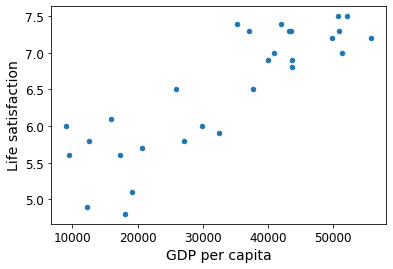

[[5.96242338]]


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv("/content/drive/MyDrive/colab/proj2023/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("/content/drive/MyDrive/colab/proj2023/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

7

Logistic Regression in Machine Learning with Python


Logistic Regression

One of the best things about the scikit-learn library in python is that it provides four steps modeling patterns that make it easy for the programmer to train a machine learning classifier. In this article, I will use Logistic Regression with python, to classify the digits which are based on images. After preparing our machine learning model with this logistic regression, we can use it to predict an image labeled with the numbers.

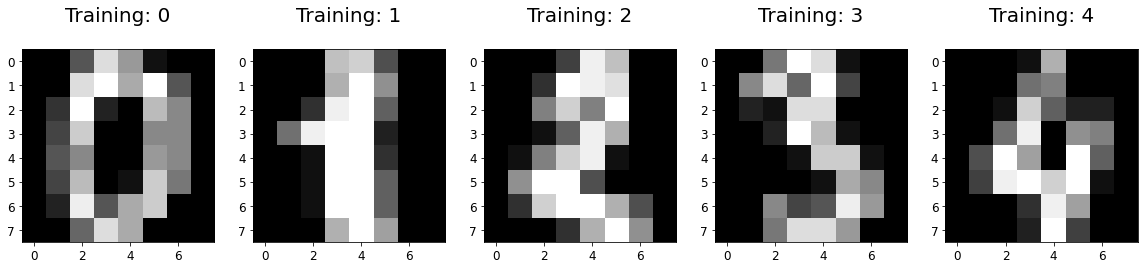

In [ ]:
# # Logistic regression on smaller built-in subset
# Load the dataset
from sklearn.datasets import load_digits
digits = load_digits()


(digits.data.shape, digits.target.shape, digits.images.shape)

#1797 images, each 8x8 in dimension and 1797 labels.

#Display sample data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], 
                                           digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);

In [ ]:
#Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                   test_size=0.25,
                                                   random_state=0)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)
clf

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [ ]:
%%time
clf.fit(X_train, y_train)

CPU times: user 13.9 s, sys: 1.57 ms, total: 13.9 s
Wall time: 14.1 s


LogisticRegression(C=50, max_iter=10000, solver='saga')

In [ ]:
#Let us see what the classifier has learned

clf.classes_
#array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
clf.coef_.shape
#(10, 64)
clf.coef_[0].round(2) # prints weights for 8x8 image for class 0

array([ 0.  , -0.01, -0.04,  0.11,  0.07, -0.14, -0.15, -0.02, -0.  ,
       -0.03, -0.04,  0.2 ,  0.09,  0.08, -0.05, -0.01, -0.  ,  0.06,
        0.16, -0.04, -0.39,  0.24,  0.09, -0.  , -0.  ,  0.12,  0.15,
       -0.17, -0.57,  0.02,  0.12, -0.  ,  0.  ,  0.15,  0.12, -0.16,
       -0.42,  0.05,  0.08,  0.  , -0.  , -0.07,  0.28, -0.12, -0.2 ,
        0.15,  0.03, -0.  , -0.  , -0.11,  0.08, -0.05,  0.2 ,  0.09,
       -0.04, -0.01, -0.  , -0.01, -0.09,  0.2 , -0.05, -0.06, -0.1 ,
       -0.05])

In [ ]:
clf.intercept_ # for 10 classes - this is a One-vs-All classification
# array([ 0.0010181 , -0.07236521,  0.00379207,  0.00459855,  0.04585855,
#         0.00014299, -0.00442972,  0.01179654,  0.04413398, -0.03454583])
clf.n_iter_[0] # num of iterations before tolerance was reached

1878

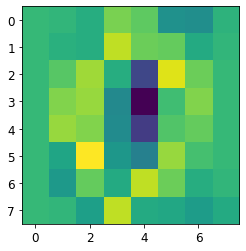

In [ ]:
# Viewing coefficients as an image
# Since there is a coefficient for each pixel in the 8x8 image, we can view them as an image itself. The code below is similar to the original viz code, but runs on coeff.

coef = clf.coef_.copy()
plt.imshow(coef[0].reshape(8,8).round(2));  # proof of concept

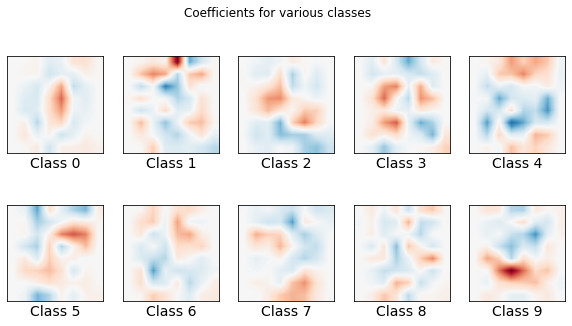

In [ ]:
coef = clf.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(10,5))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(8,8), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

In [ ]:
# Prediction and scoring
# Now predict on unknown dataset and compare with ground truth

print(clf.predict(X_test[0:9]))
print(y_test[0:9])

[2 8 2 6 6 7 1 9 8]
[2 8 2 6 6 7 1 9 8]


In [ ]:
#Score against training and test data

clf.score(X_train, y_train) # training score
#1.0
score = clf.score(X_test, y_test) # test score
score
#0.9555555555555556
#Test score: 0.9555

0.9533333333333334

In [ ]:
from sklearn import metrics
predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 41,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

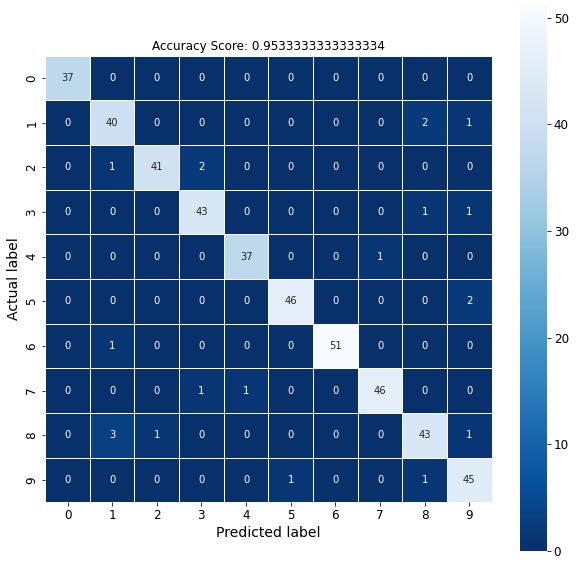

In [ ]:
#Visualize confusion matrix as a heatmap

import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);

In [ ]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassified_images.append(index)
    index +=1

In [ ]:
print(misclassified_images)

[56, 94, 118, 124, 130, 169, 181, 196, 213, 251, 315, 325, 331, 335, 378, 398, 415, 425, 429, 430, 440]


<ipython-input-90-d96aaf01c339>:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



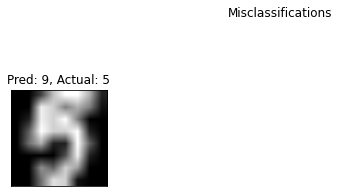

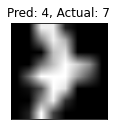

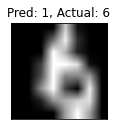

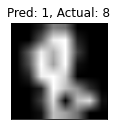

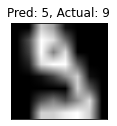

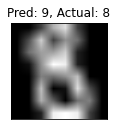

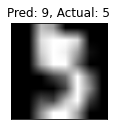

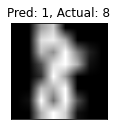

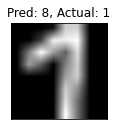

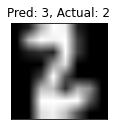

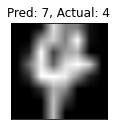

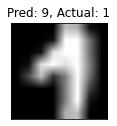

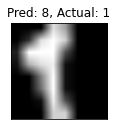

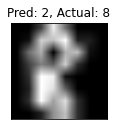

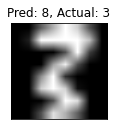

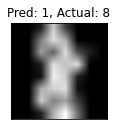

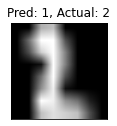

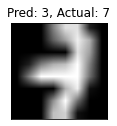

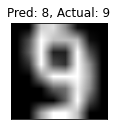

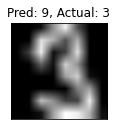

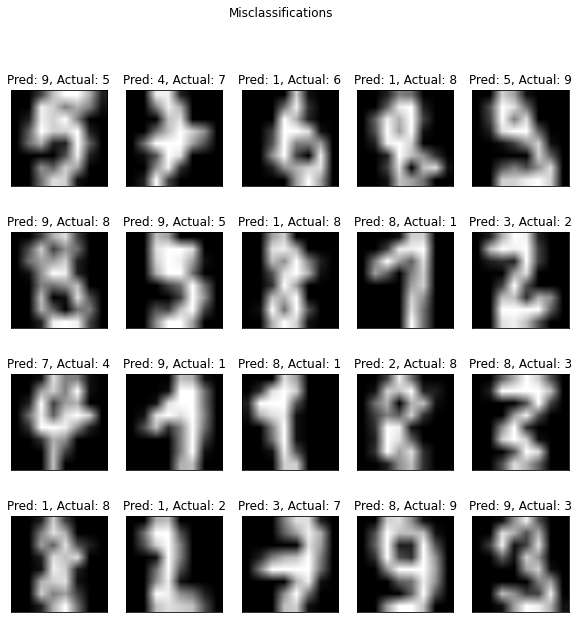

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {predictions[bad_index]}, Actual: {y_test[bad_index]}');plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {predictions[bad_index]}, Actual: {y_test[bad_index]}');

8

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

    The “cluster centre” is the arithmetic mean of all the points belonging to the cluster.
    Each point is closer to its cluster centre than to other cluster centres.

Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now, let’s take a look at a simple dataset and see the k-means result.

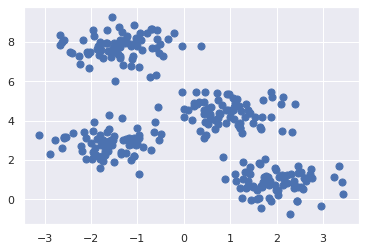

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



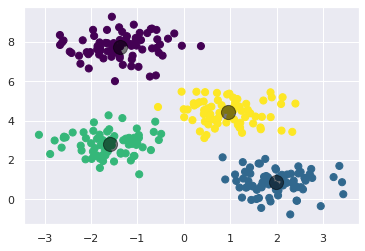

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Let’s visualize the results by plotting the data coloured by these labels. We will also plot the cluster centers as determined by the k-means estimator:

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

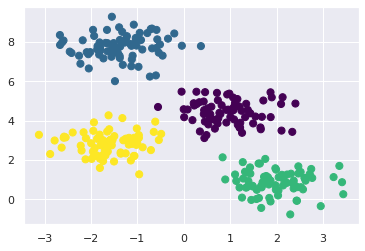

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

9

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression. In this article, I will develop the intuition behind support vector machines and their use in classification problems.



In [ ]:
#I will begin with the standard imports:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

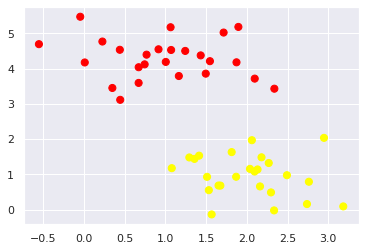

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

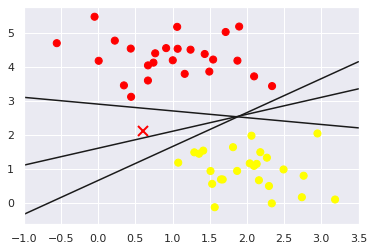

In [ ]:
# For two dimensional data like that shown here, this is a task we could do by hand.
#  But immediately we see a problem: there is more than one possible
#   dividing line that can correctly discriminate between the two classes.

# I will draw them as follows:

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5)

(-1.0, 3.5)

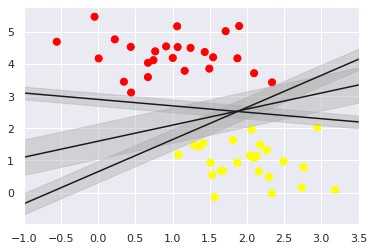

In [ ]:
# Support vector machines offer one way to improve on this. 
# The intuition is this: rather than merely drawing a zero-width
#  line between the classes, we can bring around each edge a margin 
#  of some width, up to the nearest point. Here is an example of how this might look:

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)

In [ ]:
# Fitting a Support Vector Machine

# Let’s see the result of an exact fit for this data: we will use Scikit-Learn’s support vector classifier to train an SVM model on this data. For the time being, we will use a linear kernel and set the C parameter to a very large number:

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

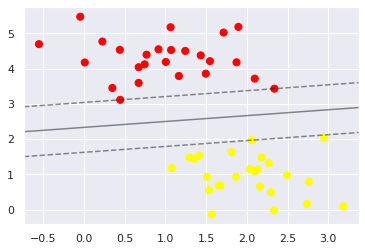

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
# This is the dividing line that maximizes the margin between the two sets of points.
#  Notice that a few of the training points just touch the margin:
#   the black circles in this figure indicate them.

# These points are the pivotal elements of this fit, and are known as the support vectors,
#  and give the algorithm its name. In Scikit-Learn, the identity of these points
#   are stored in the support_vectors_ the attribute of the classifier:

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

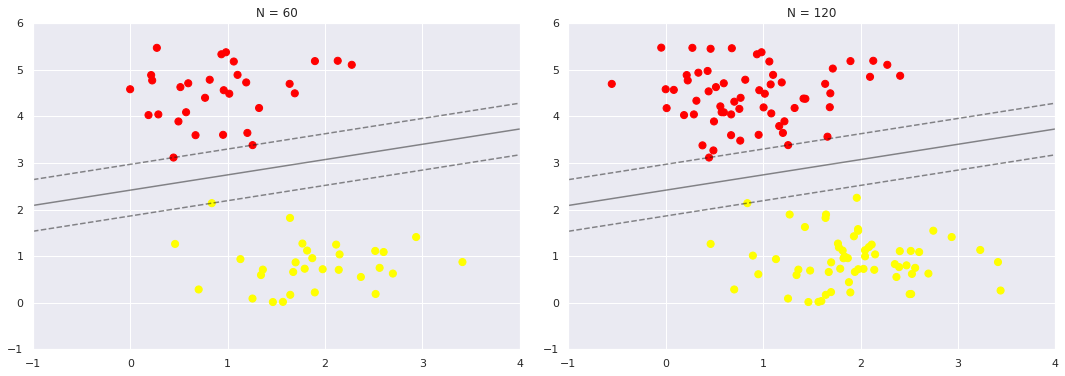

In [ ]:
# A key to this classifier’s success is that for the fit,
#  only the position of the support vectors matter; 
# any points further from the margin which are on the right side do not modify the fit!

# Technically, this is because these points do not contribute 
# to the loss function used to fit the model,
#  so their position and number do not matter so long as they do not cross the margin.

# We can see this, for example, if we plot the model learned from the first 60 points and first 120 points
#  of this dataset:

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
# Example: Face Recognition

# As an example of support vector machines in action, 
# let’s take a look at the facial recognition problem.
#  We will use the Labeled Faces in the Wild dataset,
#   which consists of several thousand collated photos
#    of various public figures. A fetcher for the dataset is built into Scikit-Learn:


In [ ]:

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


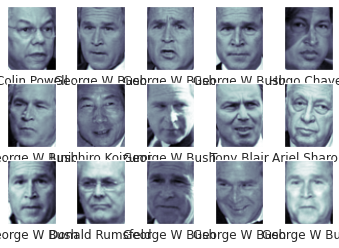

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
# Each image contains [62×47] or nearly 3,000 pixels.
#  We could proceed by merely using each pixel value as a feature,
#   but often it is more effective to use some sort of preprocessor
#    to extract more meaningful features; here, we will use a principal 
#    component analysis to remove 150 fundamental components to feed into 
#    our support vector machine classifier.

# We can do this most straightforwardly by packaging the preprocessor and 
# the classifier into a single pipeline:

from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
#from sklearn.cross_validation import train_test_split


from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:

# not been usedfrom sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 58.7 s, sys: 41.6 s, total: 1min 40s
Wall time: 1min 10s
{'svc__C': 5, 'svc__gamma': 0.001}


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

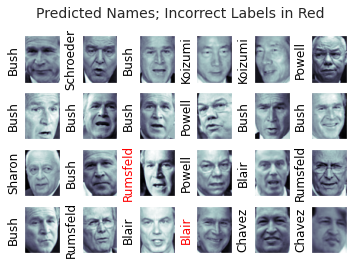

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

10

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multi-output tasks. They are powerful algorithms, capable of fitting complex datasets.

Decision trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms available today.

In this article, I will start by discussing how to train, visualize, and make predictions with Decision Trees. Then I will go through the CART training algorithm used by Scikit-Learn, and I will discuss how to regularize trees and use them for regression tasks.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
!pip install pixellib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.3/430.3 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━

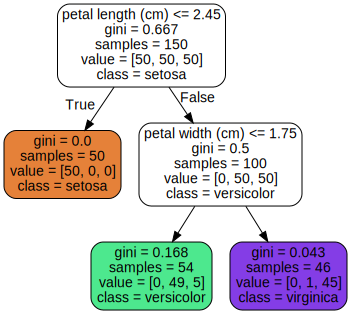

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

export_graphviz(
        tree_clf,
        out_file=os.path.join("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        
        filled=True
    )

Source.from_file(os.path.join("iris_tree.dot"))

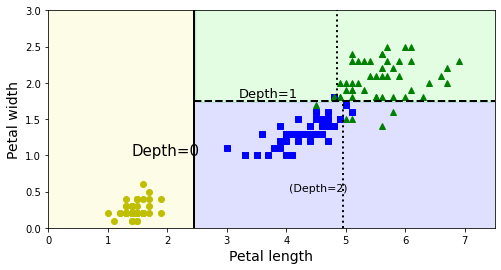

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.savefig("decision_tree_decision_boundaries_plot")
plt.show()

In [ ]:
tree_clf.predict_proba([[5, 1.5]])





array([[0.        , 0.90740741, 0.09259259]])

In [ ]:


tree_clf.predict([[5, 1.5]])

array([1])

11

Artificial neural networks are one of the main tools used in machine learning. As the “neural” part of their name suggests, they are brain-inspired systems which are intended to replicate the way that we humans learn.

Neural networks consist of input and output layers, as well as (in most cases) a hidden layer consisting of units that transform the input into something that the output layer can use.

They are excellent tools for finding patterns which are far too complex or numerous for a human programmer to extract and teach the machine to recognize.

This Machine Learning Project Classifies Clothes from the Fashion MNIST Data set using Artificial Neural Networks and Python.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion = keras.datasets.fashion_mnist
(trainImages, trainLabels), (testImages, testLabels) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Image Label : 9


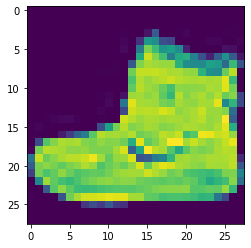

In [ ]:
imgIndex = 0
img = trainImages[imgIndex]
print("Image Label :",trainLabels[imgIndex])
plt.imshow(img)

In [ ]:
print(trainImages.shape)
print(testImages.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7ff7a211cd90>>

In [ ]:
model.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
model.fit(trainImages, trainLabels, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5015 - accuracy: 0.8304
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4871 - accuracy: 0.8340
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4853 - accuracy: 0.8335
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4695 - accuracy: 0.8409
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4623 - accuracy: 0.8417
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4601 - accuracy: 0.8421
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4551 - accuracy: 0.8426
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4516 - accuracy: 0.8439
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4514 - accuracy: 0.8449
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.440

In [ ]:
model.evaluate(testImages, testLabels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.8144


[0.5634336471557617, 0.8144000172615051]

In [ ]:
predictions = model.predict(testImages[0:5])

# Print the predicted labels
print(predictions)

1/1 [==============================] - 0s 25ms/step
[[2.82016393e-25 1.99907175e-13 0.00000000e+00 3.60340437e-15
  0.00000000e+00 2.54998431e-02 0.00000000e+00 9.33222473e-02
  1.71261936e-16 8.81177962e-01]
 [2.30675377e-03 1.92433305e-08 8.63654077e-01 5.14884221e-07
  1.12609453e-01 8.57600377e-38 2.14291811e-02 0.00000000e+00
  4.05288386e-10 0.00000000e+00]
 [1.01205834e-14 1.00000000e+00 2.46376760e-22 6.85469512e-16
  2.87577517e-26 0.00000000e+00 7.33530217e-30 0.00000000e+00
  1.45544287e-20 0.00000000e+00]
 [2.84247730e-11 1.00000000e+00 1.87510546e-17 3.97251919e-11
  1.30308450e-19 0.00000000e+00 1.47318701e-23 0.00000000e+00
  2.96759767e-16 0.00000000e+00]
 [1.36554152e-01 5.16492920e-03 1.01433627e-01 6.95950091e-02
  7.15688691e-02 4.07262180e-09 6.09477639e-01 0.00000000e+00
  6.20589033e-03 3.10065775e-13]]


In [ ]:
print(np.argmax(predictions, axis=1))
# Print the actual label values
print(testLabels[0:5])

[9 2 1 1 6]
[9 2 1 1 6]


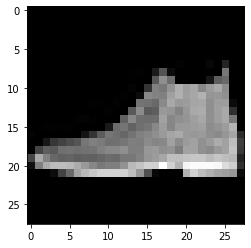

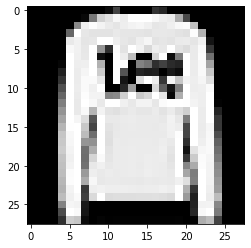

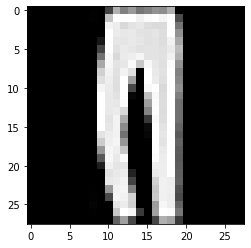

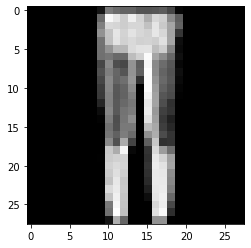

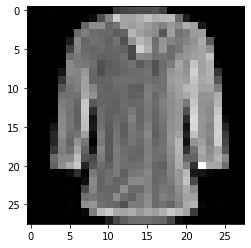

In [ ]:
# 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot 
for i in range(0,5):
  plt.imshow(testImages[i], cmap='gray')
  plt.show()

12

Flipkart Reviews Sentiment Analysis using Python



Flipkart is one of the most popular Indian companies. It is an e-commerce platform that competes with popular e-commerce platforms like Amazon. One of the most popular use cases of data science is the task of sentiment analysis of product reviews sold on e-commerce platforms. So, if you want to learn how to analyze the sentiment of Flipkart reviews, this article is for you. In this article, I will walk you through the task of Flipkart reviews sentiment analysis using Python.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")
print(data.head())

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [ ]:
print(data.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


In [ ]:

import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

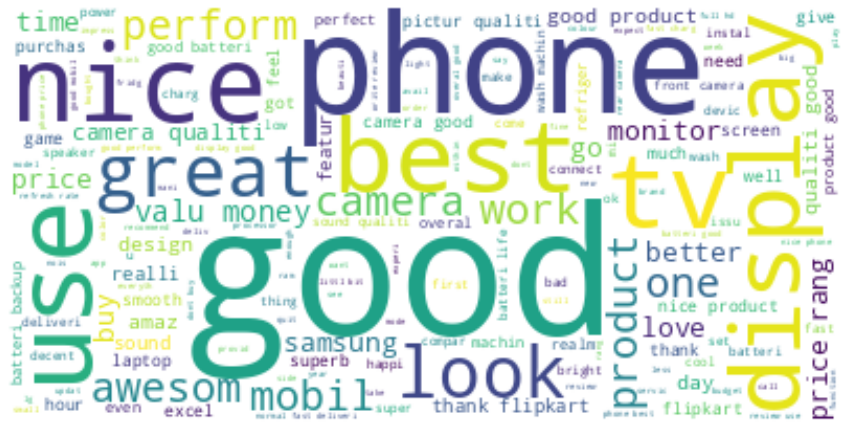

In [ ]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                              Review  Positive  Negative  \
0  best  great performancei got around  backup bi...     0.395     0.101   
1                                        good perfom     0.744     0.000   
2  great perform usual also game laptop issu batt...     0.277     0.000   
3                        wife happi best product 👌🏻😘     0.512     0.000   
4  light weight laptop new amaz featur batteri li...     0.000     0.000   

   Neutral  
0    0.504  
1    0.256  
2    0.723  
3    0.488  
4    1.000  


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.5529999999985
Negative:  96.77500000000013
Neutral:  1283.6880000000006


13


Cryptocurrency Price Prediction with Machine Learning

 

You must have heard or invested in any cryptocurrency once in your life. It is a digital medium of exchange that is encrypted and decentralized. Many people use cryptocurrencies as a form of investing because it gives great returns even in a short period. Bitcoin, Ethereum, and Binance Coin are among the popular cryptocurrencies today. If you want to know how to predict the future prices of any cryptocurrency with machine learning, this article is for you. In this article, I will walk you through the task of cryptocurrency price prediction with machine learning using Python.

In [ ]:
!pip  install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 11.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('BTC-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date          Open          High           Low         Close  \
0 2021-03-20  58332.261719  60031.285156  58213.296875  58313.644531   
1 2021-03-21  58309.914062  58767.898438  56005.617188  57523.421875   
2 2021-03-22  57517.890625  58471.480469  54288.156250  54529.144531   
3 2021-03-23  54511.660156  55985.441406  53470.695312  54738.945312   
4 2021-03-24  54710.488281  57262.382812  52514.332031  52774.265625   

      Adj Close       Volume  
0  58313.644531  50361731222  
1  57523.421875  51943414539  
2  54529.144531  56521454974  
3  54738.945312  56435023914  
4  52774.265625  70567223787  


In [ ]:
data.shape

(730, 7)

In [ ]:

import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [ ]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.997773
Low          0.997772
Open         0.995268
Volume       0.342957
Name: Close, dtype: float64


In [ ]:
!pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.4/686.4 KB 13.6 MB/s eta 0:00:00


In [ ]:

#  WARNING    IT TAKES A VERY LONG TIME TO TRAIN!!!

from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 7 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
22/22 [==============================] - 15s 11ms/step - loss: 0.4166
Epoch 2/50
22/22 [==============================] - 0s 11ms/step - loss: 0.4134
Epoch 3/50
22/22 [==============================] - 0s 11ms/step - loss: 0.4129
Epoch 4/50
22/22 [==============================] - 0s 11ms/step - loss: 0.4124
Epoch 5/50
22/22 [==============================] - 0s 10ms/step - loss: 0.4125
Epoch 6/50
22/22 [==============================] - 0s 10ms/step - loss: 0.4103
Epoch 7/50
22/22 [==============================] - 0s 11ms/step - loss: 0.4088
Epoch 8/50
22/22 [==============================] - 0s 11ms/step - loss: 0.4080
Epoch 9/50
22/22 [==============================] - 0s 9ms/step - loss: 0.4070
Epoch 10/50
22/22 [==============================] - 0s 10ms/step - loss: 0.4035
Epoch 11/50
22/22 [==============================] - 0s 11ms/step - loss: 0.4002
Epoch 12/50
22/22 [==============================]

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 36 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/1yzpp2kh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/dkv723x9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21415', 'data', 'file=/tmp/tmpoidzii_3/1yzpp2kh.json', 'init=/tmp/tmpoidzii_3/dkv723x9.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model7wovpjua/prophet_model-20230320124348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:43:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 37: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents in generation 0 of 10
Model Number: 45 with model ETS in generation 0 of 10
Model Number: 46 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 46: VECM
Model Number: 47 with model ARDL in generation 0 of 10
Model Number: 48 with model MultivariateMotif in generation 0 of 10
Model Number: 49 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/d8a9xlzv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/5oyddc8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3673', 'data', 'file=/tmp/tmpoidzii_3/d8a9xlzv.json', 'init=/tmp/tmpoidzii_3/5oyddc8c.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelj4yda1x3/prophet_model-20230320124355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 55 with model FBProphet in generation 0 of 10


12:43:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 56 with model SeasonalNaive in generation 0 of 10
Model Number: 57 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 58 with model NVAR in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 59 with model Theta in generation 0 of 10
Model Number: 60 with model UnivariateRegression in generation 0 of 10
Model Number: 61 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 61: ARCH
Model Number: 62 with model ConstantNaive in generation 0 of 10
Model Number: 63 with model LastValueNaive in generation 0 of 10
Model Number: 64 with model AverageValueNaive in generation 0 of 10
Model Number: 65 with model GLS in generation 0 of 10
Model Number: 66 with model SeasonalNaive in generation 0 of 10
Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 67: GLM
Model Number: 68 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmulti

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/lv3ifwas.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/743kyjq5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5680', 'data', 'file=/tmp/tmpoidzii_3/lv3ifwas.json', 'init=/tmp/tmpoidzii_3/743kyjq5.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model093_0shn/prophet_model-20230320124357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 69 with model FBProphet in generation 0 of 10


12:43:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 70: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Model Number: 72 with model VAR in generation 0 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: ValueError('Only gave one variable to VAR') in model 72: VAR
Model Number: 73 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 73: VECM
Model Number: 74 with model ARIMA in generation 0 of 10
Model Number: 75 with model WindowRegression in generation 0 of 10
Template Eval Error: KeyError('model') in model 75: WindowRegression
Model Number: 76 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 76: DatepartRegression
Model Number: 77 with model Univa

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 94 with model ETS in generation 0 of 10
Model Number: 95 with model AverageValueNaive in generation 0 of 10
Model Number: 96 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 96: VAR
Model Number: 97 with model GLS in generation 0 of 10
Model Number: 98 with model ARDL in generation 0 of 10
Model Number: 99 with model UnivariateMotif in generation 0 of 10
Model Number: 100 with model ARDL in generation 0 of 10
Model Number: 101 with model ETS in generation 0 of 10
Model Number: 102 with model UnivariateMotif in generation 0 of 10
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Number: 104 with model SeasonalNaive in generation 0 of 10
Model Number: 105 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 105: UnobservedComponents
Model Number: 106 with model ConstantNaive in generation 0 of

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 112 with model MetricMotif in generation 0 of 10
Model Number: 113 with model AverageValueNaive in generation 0 of 10
Model Number: 114 with model ARDL in generation 0 of 10
Model Number: 115 with model ARDL in generation 0 of 10
Model Number: 116 with model SeasonalNaive in generation 0 of 10
Model Number: 117 with model SeasonalNaive in generation 0 of 10
Model Number: 118 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 118: ARDL
Model Number: 119 with model ConstantNaive in generation 0 of 10
Model Number: 120 with model ARIMA in generation 0 of 10
Model Number: 121 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 121: ARCH
Model Number: 122 with model Theta in generation 0 of 10
Model Number: 123 with model UnivariateMotif in generation 0 of 10
Model Number: 124 with model UnivariateMotif in generation 0

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 126 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 126: GLM
Model Number: 127 with model LastValueNaive in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 128 with model SectionalMotif in generation 0 of 10
Model Number: 129 with model ConstantNaive in generation 0 of 10
Model Number: 130 with model UnivariateMotif in generation 0 of 10
Model Number: 131 with model SeasonalNaive in generation 0 of 10
Model Number: 132 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 132: VAR
Model Number: 133 with model UnivariateMotif in generation 0 of 10
Model Number: 134 with model SeasonalNaive in generation 0 of 10
Model Number: 135 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 135: ARCH
Model Number: 136 with model LastValueNaive in generation 0 of 10
Model Number: 137 with model WindowRegression in generation 0 of 10
Model Number: 138 with model GLM in generation 0 of 10
Model Number: 139 with model Theta in generation 0 of 10
Model Number: 140 with model ARDL in generation 0 of 10
Model Number

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52438e-25): result may not be accurate.



Model Number: 161 with model ConstantNaive in generation 0 of 10
Model Number: 162 with model SectionalMotif in generation 0 of 10
Model Number: 163 with model Theta in generation 0 of 10
Model Number: 164 with model AverageValueNaive in generation 0 of 10
Model Number: 165 with model Theta in generation 0 of 10
Model Number: 166 with model ETS in generation 0 of 10
Model Number: 167 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 167: GLM
Model Number: 168 with model MultivariateMotif in generation 0 of 10


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning:

invalid value encountered in multiply

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 169 with model ConstantNaive in generation 0 of 10
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 169: ConstantNaive
Model Number: 170 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 170: ARCH
Model Number: 171 with model FBProphet in generation 0 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/h_vmfqod.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/rcwde5pu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53323', 'data', 'file=/tmp/tmpoidzii_3/h_vmfqod.json', 'init=/tmp/tmpoidzii_3/rcwde5pu.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelohio7nlb/prophet_model-20230320124416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 172 with model AverageValueNaive in generation 0 of 10
Model Number: 173 with model MultivariateMotif in generation 0 of 10
Model Number: 174 with model Theta in generation 0 of 10
Model Number: 175 with model GLM in generation 0 of 10
Model Number: 176 with model UnivariateMotif in generation 0 of 10
Model Number: 177 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 177: ARDL
Model Number: 178 with model MultivariateMotif in generation 0 of 10
Model Number: 179 with model NVAR in generation 0 of 10
Model Number: 180 with model UnivariateMotif in generation 0 of 10
Model Number: 181 with model Theta in generation 0 of 10
Model Number: 182 with model SectionalMotif in generation 0 of 10
Model Number: 183 with model ARIMA in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 183: ARIMA
Model Number: 184 with model VECM in generation 0 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 197 with model UnivariateMotif in generation 1 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (61)') in model 197: UnivariateMotif
Model Number: 198 with model Theta in generation 1 of 10
Model Number: 199 with model ARDL in generation 1 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 200 with model MultivariateMotif in generation 1 of 10
Model Number: 201 with model UnobservedComponents in generation 1 of 10
Model Number: 202 with model UnivariateMotif in generation 1 of 10
Model Number: 203 with model Theta in generation 1 of 10
Model Number: 204 with model MultivariateMotif in generation 1 of 10
Model Number: 205 with model SectionalMotif in generation 1 of 10
Model Number: 206 with model LastValueNaive in generation 1 of 10
Model Number: 207 with model SeasonalNaive in generation 1 of 10
Model Number: 208 with model UnivariateMotif in generation 1 of 10
HolidayTransformer: no anomalies detected.
Model Number: 209 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 209: MultivariateRegression
Model Number: 210 with model ETS in generation 1 of 10
Model Number: 211 with model LastValueNaive in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 212 with model FBProphet in generation 1 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/o2bt1jot.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/5ahc1frs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18825', 'data', 'file=/tmp/tmpoidzii_3/o2bt1jot.json', 'init=/tmp/tmpoidzii_3/5ahc1frs.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model853p86z8/prophet_model-20230320124427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:44:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 213 with model AverageValueNaive in generation 1 of 10
Model Number: 214 with model SeasonalNaive in generation 1 of 10
Model Number: 215 with model ETS in generation 1 of 10
Model Number: 216 with model SeasonalNaive in generation 1 of 10
Model Number: 217 with model Theta in generation 1 of 10
Model Number: 218 with model ARDL in generation 1 of 10
Model Number: 219 with model ETS in generation 1 of 10
Model Number: 220 with model NVAR in generation 1 of 10
Model Number: 221 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 221: ARIMA
Model Number: 222 with model UnobservedComponents in generation 1 of 10
Model Number: 223 with model Theta in generation 1 of 10
Model Number: 224 with model DatepartRegression in generation 1 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 224: Datepart

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/ln0uo7t3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/oe16k532.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24122', 'data', 'file=/tmp/tmpoidzii_3/ln0uo7t3.json', 'init=/tmp/tmpoidzii_3/oe16k532.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelldqfkpy_/prophet_model-20230320124430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

Model Number: 236 with model FBProphet in generation 1 of 10
Model Number: 237 with model ARDL in generation 1 of 10
Model Number: 238 with model MetricMotif in generation 1 of 10
Model Number: 239 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (1103) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larer than the sample available for estimation (697).') exog train              dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nDate                                                                 ...   \n2021-03-20  20.0  1.0  2459293.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2021-03-21  21.0  1.0  2459294.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2021-03-22  22.0  0.0  2459295.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2021-03-23  23.0  0.0  2459296.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2021-03-24  24.0  0.0  245929

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 244 with model Theta in generation 1 of 10
Model Number: 245 with model UnivariateRegression in generation 1 of 10
Model Number: 246 with model DatepartRegression in generation 1 of 10
HolidayTransformer: no anomalies detected.


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 247 with model ARDL in generation 1 of 10
Model Number: 248 with model ConstantNaive in generation 1 of 10
Model Number: 249 with model Theta in generation 1 of 10
Model Number: 250 with model SeasonalNaive in generation 1 of 10
Model Number: 251 with model MultivariateRegression in generation 1 of 10
Model Number: 252 with model MultivariateMotif in generation 1 of 10
Model Number: 253 with model AverageValueNaive in generation 1 of 10
Model Number: 254 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 254: MultivariateRegression
Model Number: 255 with model SectionalMotif in generation 1 of 10
Model Number: 256 with model GLS in generation 1 of 10
Model Number: 257 with model NVAR in generation 1 of 10
Model Number: 258 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 259 with model GLS in generation 1 of 10
Model Number: 260 with model UnivariateMotif in generation 1 of 10
Model Number: 261 with model LastValueNaive in generation 1 of 10
Model Number: 262 with model MetricMotif in generation 1 of 10
Model Number: 263 with model ETS in generation 1 of 10
Model Number: 264 with model LastValueNaive in generation 1 of 10
Model Number: 265 with model MetricMotif in generation 1 of 10
Model Number: 266 with model UnivariateMotif in generation 1 of 10
Model Number: 267 with model MultivariateMotif in generation 1 of 10
Model Number: 268 with model GLS in generation 1 of 10
Model Number: 269 with model UnobservedComponents in generation 1 of 10
Model Number: 270 with model LastValueNaive in generation 1 of 10
Model Number: 271 with model ConstantNaive in generation 1 of 10
Model Number: 272 with model MetricMotif in generation 1 of 10
Model Number: 273 with model SectionalMotif in generation 1 of 10
Model Number: 274 with model LastValueNaiv

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 289 with model SectionalMotif in generation 1 of 10
Model Number: 290 with model SeasonalNaive in generation 1 of 10
Model Number: 291 with model WindowRegression in generation 1 of 10
Model Number: 292 with model NVAR in generation 1 of 10
Model Number: 293 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 293: ARIMA
Model Number: 294 with model UnivariateMotif in generation 1 of 10
Model Number: 295 with model ConstantNaive in generation 1 of 10
Model Number: 296 with model DatepartRegression in generation 1 of 10
Model Number: 297 with model AverageValueNaive in generation 1 of 10
Model Number: 298 with model DatepartRegression in generation 1 of 10


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



HolidayTransformer: no anomalies detected.
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 298: DatepartRegression
Model Number: 299 with model GLM in generation 1 of 10
Model Number: 300 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 301 with model SeasonalNaive in generation 1 of 10
Model Number: 302 with model NVAR in generation 1 of 10
Model Number: 303 with model Theta in generation 1 of 10
Model Number: 304 with model Theta in generation 1 of 10
Model Number: 305 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 305: DatepartRegression
Model Number: 306 with model UnivariateMotif in generation 1 of 10
Model Number: 307 with model FBProphet in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 307: FBProphet
Model Number: 308 with model LastValueNaive in generation 1 of 10
Model Number: 309 with model ARIMA in generation 1 of 10
Model Number: 310 with model ConstantNaive in generation 1 of 10
Model Number: 311 with model UnivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 311

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 324 with model Theta in generation 2 of 10
Model Number: 325 with model MetricMotif in generation 2 of 10
Model Number: 326 with model ARIMA in generation 2 of 10
Model Number: 327 with model LastValueNaive in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/74_0so4u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/g041b4x2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44304', 'data', 'file=/tmp/tmpoidzii_3/74_0so4u.json', 'init=/tmp/tmpoidzii_3/g041b4x2.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelx4i6o1lq/prophet_model-20230320124543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 328 with model MultivariateRegression in generation 2 of 10
Template Eval Error: InvalidParameterError("The 'base_estimator' parameter of AdaBoostRegressor must be an object implementing 'fit' and 'predict' or a str among {'deprecated'}. Got None instead.") in model 328: MultivariateRegression
Model Number: 329 with model FBProphet in generation 2 of 10


12:45:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 330 with model AverageValueNaive in generation 2 of 10
Model Number: 331 with model MetricMotif in generation 2 of 10
Model Number: 332 with model Theta in generation 2 of 10
Model Number: 333 with model GLM in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/bwk7fgnn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/umyltwmi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33094', 'data', 'file=/tmp/tmpoidzii_3/bwk7fgnn.json', 'init=/tmp/tmpoidzii_3/umyltwmi.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelvvaad77e/prophet_model-20230320124543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 334 with model FBProphet in generation 2 of 10


12:45:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 335 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 335: DatepartRegression
Model Number: 336 with model Theta in generation 2 of 10
Model Number: 337 with model MetricMotif in generation 2 of 10
Model Number: 338 with model MultivariateMotif in generation 2 of 10
Model Number: 339 with model UnivariateMotif in generation 2 of 10
Model Number: 340 with model LastValueNaive in generation 2 of 10
Model Number: 341 with model ARDL in generation 2 of 10
Model Number: 342 with model MetricMotif in generation 2 of 10
Model Number: 343 with model LastValueNaive in generation 2 of 10
Model Number: 344 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 345 with model AverageValueNaive in generation 2 of 10
Model Number: 346 with model NVAR in generation 2 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 347 with model ARDL in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 347: ARDL
Model Number: 348 with model MetricMotif in generation 2 of 10
Model Number: 349 with model Theta in generation 2 of 10
Model Number: 350 with model UnivariateMotif in generation 2 of 10
Model Number: 351 with model MetricMotif in generation 2 of 10
Model Number: 352 with model AverageValueNaive in generation 2 of 10
Model Number: 353 with model GLM in generation 2 of 10
Model Number: 354 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 355 with model UnivariateRegression in generation 2 of 10
Model Number: 356 with model ConstantNaive in generation 2 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.03649e-41): result may not be accurate.



Model Number: 357 with model ARIMA in generation 2 of 10
Model Number: 358 with model LastValueNaive in generation 2 of 10
Model Number: 359 with model MetricMotif in generation 2 of 10
Model Number: 360 with model AverageValueNaive in generation 2 of 10
Model Number: 361 with model MetricMotif in generation 2 of 10
Model Number: 362 with model ARDL in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 362: ARDL
Model Number: 363 with model UnivariateMotif in generation 2 of 10
Model Number: 364 with model FBProphet in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/b33a8m5l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/021se3_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8383', 'data', 'file=/tmp/tmpoidzii_3/b33a8m5l.json', 'init=/tmp/tmpoidzii_3/021se3_s.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model42ob32wt/prophet_model-20230320124613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:46:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:46:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:46:13 - cmdstanpy - ERROR - Chain [1] e

Model Number: 365 with model LastValueNaive in generation 2 of 10
Model Number: 366 with model GLS in generation 2 of 10
Model Number: 367 with model UnivariateMotif in generation 2 of 10
Model Number: 368 with model WindowRegression in generation 2 of 10
Model Number: 369 with model WindowRegression in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 369: WindowRegression
Model Number: 370 with model Theta in generation 2 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 371 with model UnobservedComponents in generation 2 of 10
Model Number: 372 with model NVAR in generation 2 of 10
Model Number: 373 with model UnivariateMotif in generation 2 of 10
Model Number: 374 with model Theta in generation 2 of 10
Model Number: 375 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 376 with model MultivariateRegression in generation 2 of 10
Model Number: 377 with model LastValueNaive in generation 2 of 10
Model Number: 378 with model UnobservedComponents in generation 2 of 10
Model Number: 379 with model MetricMotif in generation 2 of 10
Model Number: 380 with model UnivariateMotif in generation 2 of 10
Model Number: 381 with model SectionalMotif in generation 2 of 10
Model Number: 382 with model UnivariateMotif in generation 2 of 10
Model Number: 383 with model FBProphet in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/6x5mvmba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/q4vfnx89.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23153', 'data', 'file=/tmp/tmpoidzii_3/6x5mvmba.json', 'init=/tmp/tmpoidzii_3/q4vfnx89.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model__p6c5fu/prophet_model-20230320124619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 384 with model SectionalMotif in generation 2 of 10
Model Number: 385 with model Theta in generation 2 of 10
Model Number: 386 with model SectionalMotif in generation 2 of 10
Model Number: 387 with model ARDL in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 387: ARDL
Model Number: 388 with model NVAR in generation 2 of 10
Model Number: 389 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 390 with model SectionalMotif in generation 2 of 10
Model Number: 391 with model MetricMotif in generation 2 of 10
Model Number: 392 with model ConstantNaive in generation 2 of 10
Model Number: 393 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 394 with model MultivariateMotif in generation 2 of 10
Model Number: 395 with model ARDL in generation 2 of 10
Model Number: 396 with model ARIMA in generation 2 of 10
Model Number: 397 with model SeasonalNaive in generation 2 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 398 with model ETS in generation 2 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 399 with model AverageValueNaive in generation 2 of 10
Model Number: 400 with model ETS in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/r8npbkwc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/s9ynaalg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4604', 'data', 'file=/tmp/tmpoidzii_3/r8npbkwc.json', 'init=/tmp/tmpoidzii_3/s9ynaalg.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelsvrl6s7f/prophet_model-20230320124639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:46:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 401 with model FBProphet in generation 2 of 10


12:46:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 402 with model ARIMA in generation 2 of 10
Model Number: 403 with model DatepartRegression in generation 2 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 404 with model SectionalMotif in generation 2 of 10


/usr/local/lib/python3.9/dist-packages/autots/tools/fast_kalman.py:863: RuntimeWarning:

overflow encountered in multiply



Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 404: SectionalMotif
Model Number: 405 with model SeasonalNaive in generation 2 of 10


/usr/local/lib/python3.9/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 406 with model LastValueNaive in generation 2 of 10
Model Number: 407 with model NVAR in generation 2 of 10
Model Number: 408 with model UnivariateMotif in generation 2 of 10
Model Number: 409 with model UnivariateMotif in generation 2 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 409: UnivariateMotif
Model Number: 410 with model LastValueNaive in generation 2 of 10
Model Number: 411 with model AverageValueNaive in generation 2 of 10
Model Number: 412 with model ETS in generation 2 of 10
Model Number: 413 with model NVAR in generation 2 of 10
Model Number: 414 with model DatepartRegression in generation 2 of 10
Model Number: 415 with model ConstantNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 415: ConstantNaive
Model Number: 416 with model SectionalMotif in generation 2 of 10
Model Number: 417 with model DatepartRegression in generation 2 of 10
Model Number:

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 419 with model AverageValueNaive in generation 2 of 10
Model Number: 420 with model UnivariateMotif in generation 2 of 10
Model Number: 421 with model SeasonalNaive in generation 2 of 10
Model Number: 422 with model MultivariateRegression in generation 2 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear]Model Number: 423 with model UnivariateRegression in generation 2 of 10
Model Number: 424 with model UnobservedComponents in generation 2 of 10
Model Number: 425 with model AverageValueNaive in generation 2 of 10
Model Number: 426 with model Theta in generation 2 of 10
Model Number: 427 with model ConstantNaive in generation 2 of 10
Model Number: 428 with model MultivariateMotif in generation 2 of 10
Model Number: 429 with model UnivariateRegression in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 429: UnivariateRegression
Model Number: 430 with model ARIMA in generation 2 of 10
Model Number: 431 with model Theta in generation 2 of 10
Model Number: 432 with model Theta in generation 2 of 10
Model Number: 433 with model SeasonalNaive in generation 2 of 10
Model Number: 434 with model Theta in generation 2 of 10
Model Number: 435 with model ARIMA in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 439 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 440 with model DatepartRegression in generation 3 of 10
Epoch 1/50
9/9 [==============================] - 10s 390ms/step - loss: 728.2358 - val_loss: 215.8988
Epoch 2/50
9/9 [==============================] - 3s 326ms/step - loss: 729.0843 - val_loss: 215.6429
Epoch 3/50
9/9 [==============================] - 3s 384ms/step - loss: 728.2516 - val_loss: 215.3038
Epoch 4/50
9/9 [==============================] - 4s 473ms/step - loss: 727.7574 - val_loss: 215.0757
Epoch 5/50
9/9 [==============================] - 3s 316ms/step - loss: 727.9076 - val_loss: 214.8492
Epoch 6/50
9/9 [==============================] - 3s 316ms/step - loss: 728.8357 - val_loss: 214.6839
Epoch 7/50
9/9 [==============================] - 3s 322ms/step - loss: 728.8755 - val_loss: 214.6150
Epoch 8/50
9/9 [==============================] - 4s 508ms/step - loss: 727.2442 - val_loss: 214.5055
Epoch 9/50
9/9 [==============================] - 3s 333ms/step - loss: 729.8123 - val_loss: 214.4717
Epoch 10/50

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 469 with model ARIMA in generation 3 of 10
Model Number: 470 with model MetricMotif in generation 3 of 10
Model Number: 471 with model MetricMotif in generation 3 of 10
Model Number: 472 with model MetricMotif in generation 3 of 10
Model Number: 473 with model SeasonalNaive in generation 3 of 10
Model Number: 474 with model Theta in generation 3 of 10
Model Number: 475 with model UnobservedComponents in generation 3 of 10
Model Number: 476 with model LastValueNaive in generation 3 of 10
Model Number: 477 with model ConstantNaive in generation 3 of 10
Model Number: 478 with model ARDL in generation 3 of 10
Model Number: 479 with model SectionalMotif in generation 3 of 10
Model Number: 480 with model Theta in generation 3 of 10
Model Number: 481 with model DatepartRegression in generation 3 of 10
Model Number: 482 with model AverageValueNaive in generation 3 of 10
Model Number: 483 with model Theta in generation 3 of 10
Model Number: 484 with model ARIMA in generation 3 of 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/va41hq2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/11eg00ps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55450', 'data', 'file=/tmp/tmpoidzii_3/va41hq2p.json', 'init=/tmp/tmpoidzii_3/11eg00ps.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelg3j43qor/prophet_model-20230320124907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 491 with model FBProphet in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 491: FBProphet
Model Number: 492 with model NVAR in generation 3 of 10
Model Number: 493 with model ARIMA in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/npextp8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/6w7kmj8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91041', 'data', 'file=/tmp/tmpoidzii_3/npextp8f.json', 'init=/tmp/tmpoidzii_3/6w7kmj8p.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelvx6ngawg/prophet_model-20230320124909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 494 with model FBProphet in generation 3 of 10


12:49:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 495 with model Theta in generation 3 of 10
Model Number: 496 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/ro2ovrdu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/ebb9_dod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83305', 'data', 'file=/tmp/tmpoidzii_3/ro2ovrdu.json', 'init=/tmp/tmpoidzii_3/ebb9_dod.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelq90pf_kp/prophet_model-20230320124910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 497 with model MetricMotif in generation 3 of 10
Model Number: 498 with model Theta in generation 3 of 10
Model Number: 499 with model DatepartRegression in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 499: DatepartRegression
Model Number: 500 with model NVAR in generation 3 of 10
Model Number: 501 with model DatepartRegression in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 501: DatepartRegression
Model Number: 502 with model SeasonalNaive in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 503 with model FBProphet in generation 3 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/f2yq5x4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/6ahtw54o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43387', 'data', 'file=/tmp/tmpoidzii_3/f2yq5x4c.json', 'init=/tmp/tmpoidzii_3/6ahtw54o.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model8k9ydusk/prophet_model-20230320124914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will

Model Number: 504 with model WindowRegression in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 504: WindowRegression
Model Number: 505 with model Theta in generation 3 of 10
Model Number: 506 with model SeasonalNaive in generation 3 of 10
Model Number: 507 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 508 with model ETS in generation 3 of 10
Model Number: 509 with model MetricMotif in generation 3 of 10
Model Number: 510 with model NVAR in generation 3 of 10
Model Number: 511 with model SectionalMotif in generation 3 of 10
Model Number: 512 with model Theta in generation 3 of 10
Model Number: 513 with model MetricMotif in generation 3 of 10
Model Number: 514 with model LastValueNaive in generation 3 of 10
Model Number: 515 with model NVAR in generation 3 of 10
Model Number: 516 with model LastValueNaive in generation 3 of 10
Model Number: 517 with model ETS in generation 3 of 10
Model Number: 518 with model UnivariateMotif in generation 3 of 10
Model Number: 519 with model AverageValueNaive in generation 3 of 10
Model Number: 520 with model Theta in generation 3 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 521 with model NVAR in generation 3 of 10
Model Number: 522 with model ARDL in generation 3 of 10
Model Number: 523 with model DatepartRegression in generation 3 of 10
Model Number: 524 with model MetricMotif in generation 3 of 10
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 524: MetricMotif
Model Number: 525 with model SeasonalNaive in generation 3 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 526 with model NVAR in generation 3 of 10
Model Number: 527 with model UnivariateMotif in generation 3 of 10
Model Number: 528 with model UnivariateRegression in generation 3 of 10
Model Number: 529 with model UnobservedComponents in generation 3 of 10
Model Number: 530 with model ETS in generation 3 of 10
Model Number: 531 with model UnobservedComponents in generation 3 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 531: UnobservedComponents
Model Number: 532 with model ARDL in generation 3 of 10
Model Number: 533 with model UnivariateRegression in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 533: UnivariateRegression
Model Number: 534 with model UnivariateMotif in generation 3 of 10
Model Number: 535 with model MetricMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 535: MetricMotif
Model Number: 536 with model SectionalMotif in generation 

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 537 with model UnobservedComponents in generation 3 of 10
Model Number: 538 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             HolidayFlag\nDate                   \n2021-03-20          0.0\n2021-03-21          0.0\n2021-03-22          0.0\n2021-03-23          0.0\n2021-03-24          0.0\n...                 ...\n2023-02-13          0.0\n2023-02-14          0.0\n2023-02-15          0.0\n2023-02-16          0.0\n2023-02-17          0.0\n\n[700 rows x 1 columns] and predict             HolidayFlag\n2023-02-18          0.0\n2023-02-19          0.0\n2023-02-20          1.0\n2023-02-21          0.0\n2023-02-22          0.0\n2023-02-23          0.0\n2023-02-24          0.0\n2023-02-25          0.0\n2023-02-26          0.0\n2023-02-27          0.0\n2023-02-28          0.0\n2023-03-01          0.0\n2023-03-02          0.0\n2023-03-03 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/mb47dcx_.json


Model Number: 544 with model FBProphet in generation 3 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/puemz22c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81234', 'data', 'file=/tmp/tmpoidzii_3/mb47dcx_.json', 'init=/tmp/tmpoidzii_3/puemz22c.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelba68yu5w/prophet_model-20230320124935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/kgaff3rc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo

Model Number: 545 with model FBProphet in generation 3 of 10


12:49:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 546 with model UnobservedComponents in generation 3 of 10
Model Number: 547 with model LastValueNaive in generation 3 of 10
Model Number: 548 with model NVAR in generation 3 of 10
Model Number: 549 with model Theta in generation 3 of 10
Model Number: 550 with model NVAR in generation 3 of 10
Model Number: 551 with model DatepartRegression in generation 3 of 10
Model Number: 552 with model MultivariateMotif in generation 3 of 10


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 553 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 553: ARDL
Model Number: 554 with model SeasonalNaive in generation 3 of 10
Model Number: 555 with model LastValueNaive in generation 3 of 10
Model Number: 556 with model ETS in generation 3 of 10
Model Number: 557 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 557: UnobservedComponents
Model Number: 558 with model ETS in generation 3 of 10
Model Number: 559 with model MultivariateMotif in generation 3 of 10
Model Number: 560 with model Theta in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 560: Theta
Model Number: 561 with model MetricMotif in generation 3 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 561: MetricMotif
New Ge

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 571 with model NVAR in generation 4 of 10
Model Number: 572 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 572: DatepartRegression
Model Number: 573 with model MultivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 573: MultivariateMotif
Model Number: 574 with model AverageValueNaive in generation 4 of 10
Model Number: 575 with model MetricMotif in generation 4 of 10
Model Number: 576 with model NVAR in generation 4 of 10
Model Number: 577 with model LastValueNaive in generation 4 of 10
Model Number: 578 with model AverageValueNaive in generation 4 of 10
Model Number: 579 with model NVAR in generation 4 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 579: NVAR
Model Number: 580 with model MetricMotif in generation 4 of 10
Model N

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 584 with model ARDL in generation 4 of 10
Model Number: 585 with model ARDL in generation 4 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Template Eval Error: ValueError("ARDL series Close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             month  day  weekday  weekend       epoch\nDate                                                \n2021-03-20      3   20        5        1  16161984.0\n2021-03-21      3   21        6        1  16162848.0\n2021-03-22      3   22        0        0  16163712.0\n2021-03-23      3   23        1        0  16164576.0\n2021-03-24      3   24        2        0  16165440.0\n...           ...  ...      ...      ...         ...\n2023-02-13      2   13        0        0  16762464.0\n2023-02-14      2   14        1        0  16763328.0\n2023-02-15      2   15        2        0  16764192.0\n2023-02-16      2   16        3        0  16765056.0\n2023-02-17      2   17        4        0  16765920.0\n\n[700 rows x 5 columns] and predict             month  day  weekday  weekend       epoch\n2023-02-18      2   18        5        1  16766784.0\n2023

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 597 with model AverageValueNaive in generation 4 of 10
Model Number: 598 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 599 with model Theta in generation 4 of 10
Model Number: 600 with model ARDL in generation 4 of 10
Model Number: 601 with model ETS in generation 4 of 10
Model Number: 602 with model AverageValueNaive in generation 4 of 10
Model Number: 603 with model Theta in generation 4 of 10
Model Number: 604 with model LastValueNaive in generation 4 of 10
Model Number: 605 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 606 with model LastValueNaive in generation 4 of 10
Model Number: 607 with model ConstantNaive in generation 4 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 608 with model AverageValueNaive in generation 4 of 10
Model Number: 609 with model AverageValueNaive in generation 4 of 10
Model Number: 610 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 610: GLM
Model Number: 611 with model UnobservedComponents in generation 4 of 10


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1342: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning:

invalid value encountered in multiply



Model Number: 612 with model UnivariateMotif in generation 4 of 10
Model Number: 613 with model UnivariateMotif in generation 4 of 10
Model Number: 614 with model LastValueNaive in generation 4 of 10
Model Number: 615 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 616 with model UnivariateMotif in generation 4 of 10
Model Number: 617 with model ConstantNaive in generation 4 of 10
Model Number: 618 with model NVAR in generation 4 of 10
Model Number: 619 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 620 with model GLS in generation 4 of 10
Model Number: 621 with model SectionalMotif in generation 4 of 10
Model Number: 622 with model NVAR in generation 4 of 10
Model Number: 623 with model LastValueNaive in generation 4 of 10
Model Number: 624 with model ARDL in generation 4 of 10
Model Number: 625 with model MetricMotif in generation 4 of 10
Model Number: 626 with model UnivariateMotif in generation 4 of 10
Model Number: 627 with model SeasonalNaive in generation 4 of 10
Model Number: 628 with model ConstantNaive in generation 4 of 10
Model Number: 629 with model FBProphet in generation 4 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/4j13gfc7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/vj5apguo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33501', 'data', 'file=/tmp/tmpoidzii_3/4j13gfc7.json', 'init=/tmp/tmpoidzii_3/vj5apguo.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelp6gxty84/prophet_model-20230320125149.csv', 'method=optimize', 

Model Number: 630 with model MultivariateMotif in generation 4 of 10
Model Number: 631 with model UnivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 631: UnivariateMotif
Model Number: 632 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 632: DatepartRegression
Model Number: 633 with model SectionalMotif in generation 4 of 10
Model Number: 634 with model SeasonalNaive in generation 4 of 10
Model Number: 635 with model SectionalMotif in generation 4 of 10
Model Number: 636 with model UnobservedComponents in generation 4 of 10
Model Number: 637 with model MultivariateMotif in generation 4 of 10
Model Number: 638 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 638: ARDL
Model Number: 639 with model MetricMotif in generation 4 of 10


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 645 with model DatepartRegression in generation 4 of 10
Model Number: 646 with model MetricMotif in generation 4 of 10
Model Number: 647 with model DatepartRegression in generation 4 of 10

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.




Epoch 1/50
22/22 [==============================] - 8s 70ms/step - loss: 355.0962
Epoch 2/50
22/22 [==============================] - 2s 84ms/step - loss: 353.9822
Epoch 3/50
22/22 [==============================] - 3s 130ms/step - loss: 353.8070
Epoch 4/50
22/22 [==============================] - 2s 90ms/step - loss: 353.6628
Epoch 5/50
22/22 [==============================] - 1s 48ms/step - loss: 353.5306
Epoch 6/50
22/22 [==============================] - 1s 39ms/step - loss: 353.4037
Epoch 7/50
22/22 [==============================] - 1s 41ms/step - loss: 353.2806
Epoch 8/50
22/22 [==============================] - 1s 39ms/step - loss: 353.1509
Epoch 9/50
22/22 [==============================] - 1s 40ms/step - loss: 353.0262
Epoch 10/50
22/22 [==============================] - 1s 40ms/step - loss: 352.9005
Epoch 11/50
22/22 [==============================] - 1s 39ms/step - loss: 352.7788
Epoch 12/50
22/22 [==============================] - 1s 52ms/step - loss: 352.6659
Epoch 13/50

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 656 with model ARDL in generation 4 of 10
Model Number: 657 with model UnivariateMotif in generation 4 of 10
Model Number: 658 with model AverageValueNaive in generation 4 of 10
Model Number: 659 with model ARDL in generation 4 of 10
Model Number: 660 with model UnivariateRegression in generation 4 of 10
Model Number: 661 with model NVAR in generation 4 of 10
Model Number: 662 with model DatepartRegression in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 662: DatepartRegression
Model Number: 663 with model MetricMotif in generation 4 of 10
Model Number: 664 with model Theta in generation 4 of 10
Model Number: 665 with model MetricMotif in generation 4 of 10
HolidayTransformer: no anomalies detected.
Model Number: 666 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/b_5vcu7s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/tmgxoz6r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43999', 'data', 'file=/tmp/tmpoidzii_3/b_5vcu7s.json', 'init=/tmp/tmpoidzii_3/tmgxoz6r.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelkmz38rqp/prophet_model-20230320125335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:53:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:53:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 667 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/djh05oiz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/94q35gwn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97711', 'data', 'file=/tmp/tmpoidzii_3/djh05oiz.json', 'init=/tmp/tmpoidzii_3/94q35gwn.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modeltgbpv_9m/prophet_model-20230320125336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:53:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:53:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 668 with model ETS in generation 4 of 10
Model Number: 669 with model Theta in generation 4 of 10
Model Number: 670 with model GLS in generation 4 of 10
Model Number: 671 with model UnobservedComponents in generation 4 of 10
Model Number: 672 with model GLS in generation 4 of 10
Model Number: 673 with model LastValueNaive in generation 4 of 10
Model Number: 674 with model UnivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 674: UnivariateMotif
Model Number: 675 with model ARIMA in generation 4 of 10
Model Number: 676 with model ConstantNaive in generation 4 of 10
Model Number: 677 with model MultivariateMotif in generation 4 of 10
Model Number: 678 with model Theta in generation 4 of 10
Model Number: 679 with model ETS in generation 4 of 10
Model Number: 680 with model AverageValueNaive in generation 4 of 10
Model Number: 681 with model SectionalMotif in generation 4 of 10
Model Number: 682 with model NV

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 694 with model NVAR in generation 5 of 10
Model Number: 695 with model GLM in generation 5 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 695: GLM
Model Number: 696 with model Theta in generation 5 of 10


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1342: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning:

invalid value encountered in multiply



Model Number: 697 with model AverageValueNaive in generation 5 of 10
Model Number: 698 with model ARDL in generation 5 of 10
Model Number: 699 with model Theta in generation 5 of 10
Model Number: 700 with model MultivariateMotif in generation 5 of 10
Model Number: 701 with model MultivariateRegression in generation 5 of 10
Model Number: 702 with model ETS in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 702: ETS
Model Number: 703 with model Theta in generation 5 of 10
Model Number: 704 with model ARDL in generation 5 of 10
Model Number: 705 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 705: ARIMA
Model Number: 706 with model AverageValueNaive in generation 5 of 10
Model Number: 707 with model SectionalMotif in generation 5 of 10
Model Number: 708 with model UnivariateMotif in generation 5 of 10
Model Number: 709 with model UnivariateMotif in ge

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/7fgliv9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/glh598rf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72902', 'data', 'file=/tmp/tmpoidzii_3/7fgliv9q.json', 'init=/tmp/tmpoidzii_3/glh598rf.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelxd300elp/prophet_model-20230320125347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:53:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 711 with model FBProphet in generation 5 of 10


12:53:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 712 with model DatepartRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 713 with model DatepartRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 714 with model AverageValueNaive in generation 5 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 715 with model GLS in generation 5 of 10
Model Number: 716 with model ARDL in generation 5 of 10
Model Number: 717 with model NVAR in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 717: NVAR
Model Number: 718 with model GLS in generation 5 of 10
Model Number: 719 with model Theta in generation 5 of 10
Model Number: 720 with model ETS in generation 5 of 10
Model Number: 721 with model NVAR in generation 5 of 10
Model Number: 722 with model UnivariateMotif in generation 5 of 10
Model Number: 723 with model MultivariateMotif in generation 5 of 10
Model Number: 724 with model AverageValueNaive in generation 5 of 10
Model Number: 725 with model NVAR in generation 5 of 10
Model Number: 726 with model ARIMA in generation 5 of 10
Model Number: 727 with model ARDL in generation 5 of 10
Model Number: 728 with model MultivariateMotif in generation 5 of 10
Model Number: 729 with model SectionalMotif in generation 5 of 10
Model Nu

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 738 with model Theta in generation 5 of 10
Model Number: 739 with model ARDL in generation 5 of 10
Model Number: 740 with model MultivariateMotif in generation 5 of 10
Model Number: 741 with model NVAR in generation 5 of 10
Model Number: 742 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 743 with model ARIMA in generation 5 of 10
Model Number: 744 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 744: DatepartRegression
Model Number: 745 with model MetricMotif in generation 5 of 10
Model Number: 746 with model AverageValueNaive in generation 5 of 10
Model Number: 747 with model ARDL in generation 5 of 10
Model Number: 748 with model Theta in generation 5 of 10
Model Number: 749 with model MultivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 749: MultivariateMotif
Model Number: 750 with model Theta in generation 5 of 10
Model Number: 751 with model LastValueNaive in generation 5 of 10
Model Number: 752 with model Theta in generation 5 of 10
Model Number: 753 with model DatepartRegression in generation 5 of 10
Model Number: 754 with model ARIMA in generation 5 of 10
Model Number: 755 with model N

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 766 with model UnivariateMotif in generation 5 of 10
Model Number: 767 with model UnivariateMotif in generation 5 of 10
Model Number: 768 with model NVAR in generation 5 of 10
Model Number: 769 with model MultivariateMotif in generation 5 of 10
Model Number: 770 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 771 with model ARIMA in generation 5 of 10
Model Number: 772 with model MetricMotif in generation 5 of 10
Model Number: 773 with model ARDL in generation 5 of 10
Model Number: 774 with model SeasonalNaive in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 774: SeasonalNaive
Model Number: 775 with model LastValueNaive in generation 5 of 10
Model Number: 776 with model ARDL in generation 5 of 10
Model Number: 777 with model ARDL in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 777: ARDL
Model Number: 778 with model SectionalMotif in generation 5 of 10
Model Number: 779 with model ARIMA in generation 5 of 10
Model Number: 780 with model UnobservedComponents in generation 5 of 10
Model Number: 781 with model ETS in generation 5 of 10
Model Number: 782 with model AverageValueNaive in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 783 with model FBProphet in generation 5 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/fjwup16g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/f1a4sxe_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32856', 'data', 'file=/tmp/tmpoidzii_3/fjwup16g.json', 'init=/tmp/tmpoidzii_3/f1a4sxe_.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelmskyhywd/prophet_model-20230320125458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:54:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:54:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 784 with model UnivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 784: UnivariateRegression
Model Number: 785 with model UnivariateMotif in generation 5 of 10
Model Number: 786 with model MetricMotif in generation 5 of 10
New Generation: 6 of 10
Model Number: 787 with model UnivariateMotif in generation 6 of 10
Model Number: 788 with model SectionalMotif in generation 6 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52438e-25): result may not be accurate.



Model Number: 789 with model ConstantNaive in generation 6 of 10
Model Number: 790 with model AverageValueNaive in generation 6 of 10
Model Number: 791 with model UnivariateMotif in generation 6 of 10
Model Number: 792 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 793 with model DatepartRegression in generation 6 of 10
Template Eval Error: InvalidParameterError("The 'base_estimator' parameter of AdaBoostRegressor must be an object implementing 'fit' and 'predict' or a str among {'deprecated'}. Got None instead.") in model 793: DatepartRegression
Model Number: 794 with model MultivariateMotif in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/ra87m2be.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/8naunm4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95207', 'data', 'file=/tmp/tmpoidzii_3/ra87m2be.json', 'init=/tmp/tmpoidzii_3/8naunm4z.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model_j70vaz8/prophet_model-20230320125502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:55:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 795 with model FBProphet in generation 6 of 10


12:55:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 796 with model NVAR in generation 6 of 10
Model Number: 797 with model AverageValueNaive in generation 6 of 10
Model Number: 798 with model NVAR in generation 6 of 10
Model Number: 799 with model MultivariateRegression in generation 6 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 804 with model SeasonalNaive in generation 6 of 10
Model Number: 805 with model SectionalMotif in generation 6 of 10
Model Number: 806 with model UnobservedComponents in generation 6 of 10
Model Number: 807 with model MultivariateMotif in generation 6 of 10
Model Number: 808 with model LastValueNaive in generation 6 of 10
Model Number: 809 with model UnivariateMotif in generation 6 of 10


/usr/local/lib/python3.9/dist-packages/autots/tools/anomaly_utils.py:1066: FutureWarning:

Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.



Model Number: 810 with model LastValueNaive in generation 6 of 10
Model Number: 811 with model SeasonalNaive in generation 6 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 812 with model ARIMA in generation 6 of 10
Model Number: 813 with model Theta in generation 6 of 10
Model Number: 814 with model MetricMotif in generation 6 of 10
Model Number: 815 with model SeasonalNaive in generation 6 of 10
Model Number: 816 with model FBProphet in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/bbc1swx5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/7n5m5iyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65845', 'data', 'file=/tmp/tmpoidzii_3/bbc1swx5.json', 'init=/tmp/tmpoidzii_3/7n5m5iyp.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelg6gytv0u/prophet_model-20230320125530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:55:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:55:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 817 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 817: DatepartRegression
Model Number: 818 with model UnobservedComponents in generation 6 of 10
Model Number: 819 with model DatepartRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 820 with model SeasonalNaive in generation 6 of 10
Model Number: 821 with model ARDL in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/mysjd_yh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/w5zsv8ok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97075', 'data', 'file=/tmp/tmpoidzii_3/mysjd_yh.json', 'init=/tmp/tmpoidzii_3/w5zsv8ok.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelncmd5_j5/prophet_model-20230320125533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:55:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 822 with model FBProphet in generation 6 of 10


12:55:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 823 with model AverageValueNaive in generation 6 of 10
Model Number: 824 with model MetricMotif in generation 6 of 10
Model Number: 825 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 825: ARDL
Model Number: 826 with model MultivariateRegression in generation 6 of 10
Template Eval Error: LightGBMError('[poisson]: at least one target label is negative') in model 826: MultivariateRegression
Model Number: 827 with model ARIMA in generation 6 of 10
Model Number: 828 with model ETS in generation 6 of 10
Model Number: 829 with model UnivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 829: UnivariateRegression
Model Number: 830 with model ARDL in generation 6 of 10
Model Number: 831 with model ARDL in generation 6 of 10
Model Number: 832 with model UnobservedComponents in generation 6 of 10
Templat

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning:

invalid value encountered in matmul

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/i6l8d3m3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/3r5fcwwv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32355', 'data', 'file=/tmp/tmpoidzii_3/i6l8d3m3.json', 'init=/tmp/tm

Model Number: 839 with model FBProphet in generation 6 of 10


12:55:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 840 with model MetricMotif in generation 6 of 10
Model Number: 841 with model LastValueNaive in generation 6 of 10
Model Number: 842 with model LastValueNaive in generation 6 of 10
Model Number: 843 with model UnivariateMotif in generation 6 of 10
Model Number: 844 with model ETS in generation 6 of 10
Model Number: 845 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 845: DatepartRegression
Model Number: 846 with model SeasonalNaive in generation 6 of 10
Model Number: 847 with model LastValueNaive in generation 6 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 848 with model SectionalMotif in generation 6 of 10
Model Number: 849 with model MultivariateRegression in generation 6 of 10
Template Eval Error: LightGBMError('[poisson]: at least one target label is negative') in model 849: MultivariateRegression
Model Number: 850 with model MetricMotif in generation 6 of 10
Model Number: 851 with model MetricMotif in generation 6 of 10
Model Number: 852 with model MetricMotif in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 852: MetricMotif
Model Number: 853 with model ETS in generation 6 of 10
Model Number: 854 with model ARDL in generation 6 of 10
Model Number: 855 with model AverageValueNaive in generation 6 of 10
Model Number: 856 with model MetricMotif in generation 6 of 10
Model Number: 857 with model SectionalMotif in generation 6 of 10
Model Number: 858 with model MultivariateMotif in generation 6 of 10
Model Number: 859 with model MultivariateMotif in generation 6 of 10


/usr/local/lib/python3.9/dist-packages/autots/tools/anomaly_utils.py:1066: FutureWarning:

Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.



Model Number: 862 with model NVAR in generation 6 of 10
Model Number: 863 with model ARDL in generation 6 of 10
Model Number: 864 with model NVAR in generation 6 of 10
Model Number: 865 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 865: SectionalMotif
Model Number: 866 with model ARDL in generation 6 of 10
Model Number: 867 with model Theta in generation 6 of 10
Model Number: 868 with model MetricMotif in generation 6 of 10
Model Number: 869 with model SectionalMotif in generation 6 of 10
Model Number: 870 with model GLS in generation 6 of 10
Model Number: 871 with model AverageValueNaive in generation 6 of 10
Model Number: 872 with model MetricMotif in generation 6 of 10
Model Number: 873 with model Theta in generation 6 of 10
Model Number: 874 with model SectionalMotif in generation 6 of 10
Model Number: 875 with model UnivariateRegression in generation 6 of 10
Template Eval Error: 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

New Generation: 7 of 10
Model Number: 887 with model NVAR in generation 7 of 10
Model Number: 888 with model MultivariateMotif in generation 7 of 10
Model Number: 889 with model SeasonalNaive in generation 7 of 10
Model Number: 890 with model MultivariateRegression in generation 7 of 10
Model Number: 891 with model UnivariateMotif in generation 7 of 10
Model Number: 892 with model GLM in generation 7 of 10
Model Number: 893 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 893: ARDL
Model Number: 894 with model DatepartRegression in generation 7 of 10
Model Number: 895 with model MultivariateRegression in generation 7 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel

Model Number: 896 with model NVAR in generation 7 of 10
Model Number: 897 with model ARDL in generation 7 of 10
Model Number: 898 with model ARIMA in generation 7 of 10
Model Number: 899 with model ARIMA in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 899: ARIMA
Model Number: 900 with model LastValueNaive in generation 7 of 10
Model Number: 901 with model MetricMotif in generation 7 of 10
Model Number: 902 with model Theta in generation 7 of 10
Model Number: 903 with model SectionalMotif in generation 7 of 10
Model Number: 904 with model UnobservedComponents in generation 7 of 10
Model Number: 905 with model ARDL in generation 7 of 10
Model Number: 906 with model Theta in generation 7 of 10
Model Number: 907 with model Theta in generation 7 of 10
Model Number: 908 with model SectionalMotif in generation 7 of 10
Model Number: 909 with model ARIMA in generation 7 of 10
Model Number: 910 with model AverageValueNaiv

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/_2yg3k5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/fhcbij6h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95730', 'data', 'file=/tmp/tmpoidzii_3/_2yg3k5a.json', 'init=/tmp/tmpoidzii_3/fhcbij6h.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modeluj6x1ux7/prophet_model-20230320125658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:56:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] st

Model Number: 915 with model SeasonalNaive in generation 7 of 10
Model Number: 916 with model DatepartRegression in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 916: DatepartRegression
Model Number: 917 with model UnobservedComponents in generation 7 of 10
Model Number: 918 with model MetricMotif in generation 7 of 10
Model Number: 919 with model Theta in generation 7 of 10
Model Number: 920 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 921 with model LastValueNaive in generation 7 of 10
Model Number: 922 with model MultivariateMotif in generation 7 of 10
Model Number: 923 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 924 with model ARDL in generation 7 of 10


/usr/local/lib/python3.9/dist-packages/autots/tools/anomaly_utils.py:1066: FutureWarning:

Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 924: ARDL
Model Number: 925 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 925: DatepartRegression
Model Number: 926 with model ARDL in generation 7 of 10
Model Number: 927 with model MetricMotif in generation 7 of 10
Model Number: 928 with model ARIMA in generation 7 of 10
Model Number: 929 with model ARDL in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/evw8xgm0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/mnfdc41h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61696', 'data', 'file=/tmp/tmpoidzii_3/evw8xgm0.json', 'init=/tmp/tmpoidzii_3/mnfdc41h.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelxseaufk0/prophet_model-20230320125752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:57:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:57:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 930 with model FBProphet in generation 7 of 10
Model Number: 931 with model AverageValueNaive in generation 7 of 10
Model Number: 932 with model UnobservedComponents in generation 7 of 10
Model Number: 933 with model AverageValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 933: AverageValueNaive
Model Number: 934 with model DatepartRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 935 with model SeasonalNaive in generation 7 of 10
Model Number: 936 with model SectionalMotif in generation 7 of 10
Model Number: 937 with model NVAR in generation 7 of 10
Model Number: 938 with model ETS in generation 7 of 10
Model Number: 939 with model ConstantNaive in generation 7 of 10
Model Number: 940 with model SeasonalNaive in generation 7 of 10
Model Number: 941 with model UnobservedComponents in generation 7 of 10
Model Number: 942 with model Theta in generation 7 of 10
Model Number: 943 with model ARDL in generation 7 of 10
Model Number: 944 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 945 with model SeasonalNaive in generation 7 of 10
Model Number: 946 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 946: ARDL
Model Number: 947 with model MetricMotif in generation 7 of 10
Model Number: 948 with model LastValueNaive in generation 7 of 10
Model Number: 949 with model SectionalMotif in generation 7 of 10
Model Number: 950 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 951 with model ARIMA in generation 7 of 10
Model Number: 952 with model WindowRegression in generation 7 of 10
Model Number: 953 with model ARDL in generation 7 of 10
Model Number: 954 with model NVAR in generation 7 of 10
Model Number: 955 with model LastValueNaive in generation 7 of 10
Model Number: 956 with model GLS in generation 7 of 10
Model Number: 957 with model LastValueNaive in generation 7 of 10
Model Number: 958 with model ConstantNaive in generation 7 of 10
Model Number: 959 with model UnobservedComponents in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 959: UnobservedComponents
Model Number: 960 with model Theta in generation 7 of 10
Model Number: 961 with model MetricMotif in generation 7 of 10
Model Number: 962 with model SeasonalNaive in generation 7 of 10
Model Number: 963 with model DatepartRegression in generation 7 of 10
Template Eval Error: InvalidParameterError("The 'base_estimator' parameter 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 969 with model Theta in generation 7 of 10
Model Number: 970 with model ETS in generation 7 of 10
Model Number: 971 with model ARIMA in generation 7 of 10
Model Number: 972 with model Theta in generation 7 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 973 with model MultivariateMotif in generation 7 of 10
Model Number: 974 with model SectionalMotif in generation 7 of 10
Model Number: 975 with model UnivariateMotif in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/s9x4n57s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/10gwcvm3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43850', 'data', 'file=/tmp/tmpoidzii_3/s9x4n57s.json', 'init=/tmp/tmpoidzii_3/10gwcvm3.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modeldkl0fk6b/prophet_model-20230320125848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Model Number: 976 with model FBProphet in generation 7 of 10


12:58:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:58:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 977 with model UnobservedComponents in generation 7 of 10
Model Number: 978 with model ETS in generation 7 of 10
Model Number: 979 with model MultivariateMotif in generation 7 of 10
Model Number: 980 with model LastValueNaive in generation 7 of 10
Model Number: 981 with model LastValueNaive in generation 7 of 10
Model Number: 982 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 983 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 984 with model ETS in generation 7 of 10
Model Number: 985 with model SectionalMotif in generation 7 of 10
Model Number: 986 with model ARDL in generation 7 of 10
New Generation: 8 of 10
Model Number: 987 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 987: DatepartRegression
Model Number: 988 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 988: LastValueNaive
Model Number: 989 with model UnivariateMotif in generation 8 of 10
Model Number: 990 with model UnivariateMotif in generation 8 of 10
Model Number: 991 with model AverageValueNaive in generation 8 of 10
Model Number: 992 with model UnobservedComponents in generation 8 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 993 with model ARIMA in generation 8 of 10
Model Number: 994 with model MetricMotif in generation 8 of 10
Model Number: 995 with model FBProphet in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 995: FBProphet
Model Number: 996 with model UnivariateMotif in generation 8 of 10
Model Number: 997 with model SeasonalNaive in generation 8 of 10
Model Number: 998 with model ConstantNaive in generation 8 of 10
Model Number: 999 with model DatepartRegression in generation 8 of 10
Model Number: 1000 with model ARDL in generation 8 of 10


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 1001 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1002 with model FBProphet in generation 8 of 10
Model Number: 1003 with model AverageValueNaive in generation 8 of 10
Model Number: 1004 with model ARDL in generation 8 of 10
Model Number: 1005 with model Theta in generation 8 of 10
Model Number: 1006 with model ARIMA in generation 8 of 10
Model Number: 1007 with model UnivariateMotif in generation 8 of 10
Model Number: 1008 with model UnivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1008: UnivariateMotif
Model Number: 1009 with model NVAR in generation 8 of 10
Model Number: 1010 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1010: WindowRegression
Model Number: 1011 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1011: ARDL
Model Number: 1012 with model NVAR in generatio

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1022 with model NVAR in generation 8 of 10
Model Number: 1023 with model LastValueNaive in generation 8 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1024 with model SeasonalNaive in generation 8 of 10
Model Number: 1025 with model MetricMotif in generation 8 of 10
Model Number: 1026 with model MetricMotif in generation 8 of 10
Model Number: 1027 with model Theta in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1027: Theta
Model Number: 1028 with model UnivariateMotif in generation 8 of 10
Model Number: 1029 with model MetricMotif in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1029: MetricMotif
Model Number: 1030 with model Theta in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/urccsszl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/a7mugwtv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6729', 'data', 'file=/tmp/tmpoidzii_3/urccsszl.json', 'init=/tmp/tmpoidzii_3/a7mugwtv.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelyewbgcp4/prophet_model-20230320125912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:59:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:59:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1031 with model FBProphet in generation 8 of 10
Model Number: 1032 with model LastValueNaive in generation 8 of 10
Model Number: 1033 with model SectionalMotif in generation 8 of 10
Model Number: 1034 with model ARDL in generation 8 of 10
Model Number: 1035 with model Theta in generation 8 of 10
Model Number: 1036 with model ARDL in generation 8 of 10
Model Number: 1037 with model UnivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1037: UnivariateMotif
Model Number: 1038 with model ARDL in generation 8 of 10
Model Number: 1039 with model SectionalMotif in generation 8 of 10
Model Number: 1040 with model GLM in generation 8 of 10
Model Number: 1041 with model AverageValueNaive in generation 8 of 10
Model Number: 1042 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1043 with model SeasonalNaive in generation 8 of 10
Model Number: 1044 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1045 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1045: MultivariateRegression
Model Number: 1046 with model UnobservedComponents in generation 8 of 10
Model Number: 1047 with model MetricMotif in generation 8 of 10
Model Number: 1048 with model ARDL in generation 8 of 10
Model Number: 1049 with model MetricMotif in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1049: MetricMotif
Model Number: 1050 with model NVAR in generation 8 of 10
Model Number: 1051 with model NVAR in generation 8 of 10
Model Number: 1052 with model ETS in generation 8 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 1053 with model DatepartRegression in generation 8 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52438e-25): result may not be accurate.



Model Number: 1054 with model NVAR in generation 8 of 10
Model Number: 1055 with model MultivariateMotif in generation 8 of 10
Model Number: 1056 with model MultivariateMotif in generation 8 of 10
Model Number: 1057 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1058 with model SectionalMotif in generation 8 of 10
Model Number: 1059 with model UnobservedComponents in generation 8 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1060 with model NVAR in generation 8 of 10
Model Number: 1061 with model Theta in generation 8 of 10
Model Number: 1062 with model MultivariateMotif in generation 8 of 10
Model Number: 1063 with model GLS in generation 8 of 10
Model Number: 1064 with model UnivariateMotif in generation 8 of 10
Model Number: 1065 with model ARDL in generation 8 of 10


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 1066 with model UnobservedComponents in generation 8 of 10
Model Number: 1067 with model GLM in generation 8 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1067: GLM
Model Number: 1068 with model MultivariateMotif in generation 8 of 10
Model Number: 1069 with model LastValueNaive in generation 8 of 10
Model Number: 1070 with model MetricMotif in generation 8 of 10
Model Number: 1071 with model MultivariateMotif in generation 8 of 10
Model Number: 1072 with model ARIMA in generation 8 of 10


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning:

invalid value encountered in log



Model Number: 1073 with model MetricMotif in generation 8 of 10
Model Number: 1074 with model LastValueNaive in generation 8 of 10
Model Number: 1075 with model NVAR in generation 8 of 10
Model Number: 1076 with model ARIMA in generation 8 of 10
Model Number: 1077 with model MetricMotif in generation 8 of 10
Model Number: 1078 with model SeasonalNaive in generation 8 of 10
Model Number: 1079 with model DatepartRegression in generation 8 of 10
Model Number: 1080 with model SectionalMotif in generation 8 of 10
Model Number: 1081 with model AverageValueNaive in generation 8 of 10
Model Number: 1082 with model UnobservedComponents in generation 8 of 10
Model Number: 1083 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1083: ARDL
Model Number: 1084 with model SectionalMotif in generation 8 of 10
Model Number: 1085 with model LastValueNaive in generation 8 of 10
Model Number: 1086 with model ETS in gen

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/49uyk3wh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/6_l6ihkg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53321', 'data', 'file=/tmp/tmpoidzii_3/49uyk3wh.json', 'init=/tmp/tmpoidzii_3/6_l6ihkg.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelr77h9klk/prophet_model-20230320125934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:59:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:59:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1092 with model NVAR in generation 9 of 10
Model Number: 1093 with model UnivariateMotif in generation 9 of 10
Model Number: 1094 with model UnobservedComponents in generation 9 of 10
Model Number: 1095 with model Theta in generation 9 of 10
Model Number: 1096 with model GLS in generation 9 of 10
Model Number: 1097 with model ETS in generation 9 of 10
Model Number: 1098 with model MultivariateMotif in generation 9 of 10
Model Number: 1099 with model AverageValueNaive in generation 9 of 10
Model Number: 1100 with model AverageValueNaive in generation 9 of 10
Model Number: 1101 with model MultivariateRegression in generation 9 of 10
Model Number: 1102 with model SectionalMotif in generation 9 of 10
Model Number: 1103 with model NVAR in generation 9 of 10
Model Number: 1104 with model DatepartRegression in generation 9 of 10
Epoch 1/50
88/88 [==============================] - 3s 4ms/step - loss: 7.1927
Epoch 2/50
88/88 [==============================] - 0s 4ms/step - loss: 7

1/1 [==============================] - 0s 413ms/step
Template Eval Error: ValueError('Must pass 2-d input. shape=(30, 30, 7)') in model 1104: DatepartRegression
Model Number: 1105 with model SeasonalNaive in generation 9 of 10
Model Number: 1106 with model LastValueNaive in generation 9 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1107 with model Theta in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1107: Theta
Model Number: 1108 with model MultivariateMotif in generation 9 of 10
Model Number: 1109 with model MultivariateMotif in generation 9 of 10
Model Number: 1110 with model ARDL in generation 9 of 10
Model Number: 1111 with model SectionalMotif in generation 9 of 10
Model Number: 1112 with model DatepartRegression in generation 9 of 10
Model Number: 1113 with model ETS in generation 9 of 10
Model Number: 1114 with model DatepartRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1115 with model UnivariateMotif in generation 9 of 10
Model Number: 1116 with model DatepartRegression in generation 9 of 10
Model Number: 1117 with model ETS in generation 9 of 10
Model Number: 1118 with model Theta in generation 9 of 10
Model Number: 1119 with model UnivariateRegression in generation 9 of 10
Model Number: 1120 with model FBProphet in generation 9 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/rp3qdeqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/jygjy8px.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36194', 'data', 'file=/tmp/tmpoidzii_3/rp3qdeqa.json', 'init=/tmp/tmpoidzii_3/jygjy8px.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelu9bgk76m/prophet_model-20230320130001.csv', 'method=optimize', 

Model Number: 1121 with model NVAR in generation 9 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Model Number: 1122 with model DatepartRegression in generation 9 of 10
Model Number: 1123 with model ARDL in generation 9 of 10
Model Number: 1124 with model MultivariateMotif in generation 9 of 10
Model Number: 1125 with model ETS in generation 9 of 10
Model Number: 1126 with model MultivariateMotif in generation 9 of 10
Model Number: 1127 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1128 with model NVAR in generation 9 of 10
Model Number: 1129 with model ARDL in generation 9 of 10
Model Number: 1130 with model NVAR in generation 9 of 10
Model Number: 1131 with model UnivariateMotif in generation 9 of 10
Model Number: 1132 with model NVAR in generation 9 of 10
Model Number: 1133 with model NVAR in generation 9 of 10
Model Number: 1134 with model MetricMotif in generation 9 of 10
Model Number: 1135 with model ARIMA in generation 9 of 10
Model Number: 1136 with model UnivariateMotif in generation 9 of 10
Model Number: 1137 with model NVAR in generation 9 of 10
Model Number: 1138 with model ARIMA in generation 9 of 10
Model Number: 1139 with model ConstantNaive in generation 9 of 10
Model Number: 1140 with model FBProphet in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1140: FBProphet
Model Number: 1141 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueE

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1152 with model LastValueNaive in generation 9 of 10
Model Number: 1153 with model UnivariateMotif in generation 9 of 10
Model Number: 1154 with model AverageValueNaive in generation 9 of 10
Model Number: 1155 with model SectionalMotif in generation 9 of 10
Model Number: 1156 with model UnobservedComponents in generation 9 of 10
Model Number: 1157 with model AverageValueNaive in generation 9 of 10
Model Number: 1158 with model UnivariateMotif in generation 9 of 10
Model Number: 1159 with model MetricMotif in generation 9 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1160 with model SeasonalNaive in generation 9 of 10
Model Number: 1161 with model SectionalMotif in generation 9 of 10
Model Number: 1162 with model MultivariateMotif in generation 9 of 10
Model Number: 1163 with model MetricMotif in generation 9 of 10
Model Number: 1164 with model NVAR in generation 9 of 10
Model Number: 1165 with model SectionalMotif in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1165: SectionalMotif
Model Number: 1166 with model AverageValueNaive in generation 9 of 10
Model Number: 1167 with model UnivariateMotif in generation 9 of 10
Model Number: 1168 with model Theta in generation 9 of 10
Model Number: 1169 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1169: ARDL
Model Number: 1170 with model GLM in generation 9 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  Th

/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning:

invalid value encountered in log



Model Number: 1173 with model SectionalMotif in generation 9 of 10
Model Number: 1174 with model MetricMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1174: MetricMotif
Model Number: 1175 with model MultivariateRegression in generation 9 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1176 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1176: ARDL
Model Number: 1177 with model ARIMA in generation 9 of 10
Model Number: 1178 with model MetricMotif in generation 9 of 10
Model Number: 1179 with model UnivariateMotif in generation 9 of 10
Model Number: 1180 with model LastValueNaive in generation 9 of 10
Model Number: 1181 with model MultivariateMotif in generation 9 of 10
Model Number: 1182 with model UnivariateMotif in generation 9 of 10
Model Number: 1183 with model SectionalMotif in generation 9 of 10
Model Number: 1184 with model SectionalMotif in generation 9 of 10
Model Number: 1185 with model Theta in generation 9 of 10
Model Number: 1186 with model LastValueNaive in generation 9 of 10
New Generation: 10 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/o58k78cc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/gur9488s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11550', 'data', 'file=/tmp/tmpoidzii_3/o58k78cc.json', 'init=/tmp/tmpoidzii_3/gur9488s.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model10lb616i/prophet_model-20230320130023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:00:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1187 with model FBProphet in generation 10 of 10


13:00:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1188 with model ARDL in generation 10 of 10
Model Number: 1189 with model DatepartRegression in generation 10 of 10
Model Number: 1190 with model NVAR in generation 10 of 10


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 1191 with model NVAR in generation 10 of 10
Model Number: 1192 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1193 with model DatepartRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 1194 with model ARDL in generation 10 of 10
Model Number: 1195 with model SectionalMotif in generation 10 of 10
Model Number: 1196 with model AverageValueNaive in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1196: AverageValueNaive
Model Number: 1197 with model LastValueNaive in generation 10 of 10
Model Number: 1198 with model MultivariateMotif in generation 10 of 10
Model Number: 1199 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1199: DatepartRegression
Model Number: 1200 with model ARDL in generation 10 of 10
Model Number: 1201 with model ETS in generation 10 of 10
Model Number: 1202 with model MultivariateMotif in generation 10 of 10
Model Number: 1203 with model MetricMotif in generation 10 of 10
Model Number: 1204 with model AverageValueNaive in generation 10 of 10
Model Number: 1205 with model NVAR in ge

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1207 with model MetricMotif in generation 10 of 10
Model Number: 1208 with model LastValueNaive in generation 10 of 10
Model Number: 1209 with model ARIMA in generation 10 of 10
Model Number: 1210 with model ARDL in generation 10 of 10
Model Number: 1211 with model Theta in generation 10 of 10
Model Number: 1212 with model ARDL in generation 10 of 10
Model Number: 1213 with model MultivariateMotif in generation 10 of 10
Model Number: 1214 with model ETS in generation 10 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 1215 with model NVAR in generation 10 of 10
Model Number: 1216 with model NVAR in generation 10 of 10
Model Number: 1217 with model DatepartRegression in generation 10 of 10
Model Number: 1218 with model MetricMotif in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1218: MetricMotif
Model Number: 12

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1264 with model Ensemble in generation 11 of Ensembles
Model Number: 1265 with model Ensemble in generation 11 of Ensembles
Model Number: 1266 with model Ensemble in generation 11 of Ensembles
Model Number: 1267 with model Ensemble in generation 11 of Ensembles
Model Number: 1268 with model Ensemble in generation 11 of Ensembles
Model Number: 1269 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 191 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 15.13: 
Model Number: 2 of 191 with model Ensemble for Validation 1
2 - Ensemble with avg smape 15.52: 
Model Number: 3 of 191 with model Ensemble for Validation 1
3 - Ensemble with avg smape 15.52: 
Model Number: 4 of 191 with model MultivariateMotif for Validation 1
📈 4 - MultivariateMotif with avg smape 4.61: 
Model Number: 5 of 191 with model Ensemble for Validation 1
5 - Ensemble with avg smape 22.43: 
Model Number: 6 of 191 with model Ensemble for Validation 1


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



6 - Ensemble with avg smape 24.5: 
Model Number: 7 of 191 with model Ensemble for Validation 1
7 - Ensemble with avg smape 14.15: 
Model Number: 8 of 191 with model MultivariateMotif for Validation 1
8 - MultivariateMotif with avg smape 23.49: 
Model Number: 9 of 191 with model SectionalMotif for Validation 1
9 - SectionalMotif with avg smape 21.5: 
Model Number: 10 of 191 with model NVAR for Validation 1


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



10 - NVAR with avg smape 28.35: 
Model Number: 11 of 191 with model Ensemble for Validation 1
11 - Ensemble with avg smape 20.82: 
Model Number: 12 of 191 with model MetricMotif for Validation 1
12 - MetricMotif with avg smape 34.65: 
Model Number: 13 of 191 with model MetricMotif for Validation 1
13 - MetricMotif with avg smape 18.91: 
Model Number: 14 of 191 with model MultivariateMotif for Validation 1
14 - MultivariateMotif with avg smape 30.16: 
Model Number: 15 of 191 with model MultivariateMotif for Validation 1
15 - MultivariateMotif with avg smape 20.8: 
Model Number: 16 of 191 with model SectionalMotif for Validation 1
16 - SectionalMotif with avg smape 27.74: 
Model Number: 17 of 191 with model DatepartRegression for Validation 1
17 - DatepartRegression with avg smape 8.87: 
Model Number: 18 of 191 with model MetricMotif for Validation 1
18 - MetricMotif with avg smape 24.54: 
Model Number: 19 of 191 with model ARDL for Validation 1
19 - ARDL with avg smape 27.99: 
Model Num

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

31 - MultivariateRegression with avg smape 10.99: 
Model Number: 32 of 191 with model MetricMotif for Validation 1
32 - MetricMotif with avg smape 29.84: 
Model Number: 33 of 191 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


33 - DatepartRegression with avg smape 9.52: 
Model Number: 34 of 191 with model MultivariateMotif for Validation 1
34 - MultivariateMotif with avg smape 21.78: 
Model Number: 35 of 191 with model ARDL for Validation 1
35 - ARDL with avg smape 8.95: 
Model Number: 36 of 191 with model MetricMotif for Validation 1
36 - MetricMotif with avg smape 12.98: 
Model Number: 37 of 191 with model ETS for Validation 1
37 - ETS with avg smape 12.19: 
Model Number: 38 of 191 with model LastValueNaive for Validation 1
38 - LastValueNaive with avg smape 8.27: 
Model Number: 39 of 191 with model LastValueNaive for Validation 1
39 - LastValueNaive with avg smape 8.27: 
Model Number: 40 of 191 with model LastValueNaive for Validation 1
40 - LastValueNaive with avg smape 8.27: 
Model Number: 41 of 191 with model Theta for Validation 1
41 - Theta with avg smape 8.15: 
Model Number: 42 of 191 with model LastValueNaive for Validation 1
42 - LastValueNaive with avg smape 10.65: 
Model Number: 43 of 191 with 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


59 - DatepartRegression with avg smape 9.94: 
Model Number: 60 of 191 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

60 - MultivariateRegression with avg smape 13.7: 
Model Number: 61 of 191 with model UnivariateMotif for Validation 1
61 - UnivariateMotif with avg smape 23.28: 
Model Number: 62 of 191 with model ARDL for Validation 1
62 - ARDL with avg smape 11.34: 
Model Number: 63 of 191 with model ARDL for Validation 1
63 - ARDL with avg smape 11.4: 
Model Number: 64 of 191 with model LastValueNaive for Validation 1
64 - LastValueNaive with avg smape 24.06: 
Model Number: 65 of 191 with model Theta for Validation 1
65 - Theta with avg smape 10.33: 
Model Number: 66 of 191 with model ARDL for Validation 1
66 - ARDL with avg smape 7.95: 
Model Number: 67 of 191 with model LastValueNaive for Validation 1
67 - LastValueNaive with avg smape 24.95: 
Model Number: 68 of 191 with model LastValueNaive for Validation 1
68 - LastValueNaive with avg smape 24.5: 
Model Number: 69 of 191 with model Theta for Validation 1
69 - Theta with avg smape 11.45: 
Model Number: 70 of 191 with model AverageValueNaive for 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

81 - MultivariateRegression with avg smape 11.48: 
Model Number: 82 of 191 with model Theta for Validation 1
82 - Theta with avg smape 11.92: 
Model Number: 83 of 191 with model Theta for Validation 1


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



83 - Theta with avg smape 11.91: 
Model Number: 84 of 191 with model MultivariateRegression for Validation 1
84 - MultivariateRegression with avg smape 12.45: 
Model Number: 85 of 191 with model Theta for Validation 1
85 - Theta with avg smape 11.58: 
Model Number: 86 of 191 with model Theta for Validation 1
86 - Theta with avg smape 31.23: 
Model Number: 87 of 191 with model DatepartRegression for Validation 1
87 - DatepartRegression with avg smape 31.06: 
Model Number: 88 of 191 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

88 - MultivariateRegression with avg smape 11.72: 
Model Number: 89 of 191 with model AverageValueNaive for Validation 1
89 - AverageValueNaive with avg smape 32.31: 
Model Number: 90 of 191 with model AverageValueNaive for Validation 1


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


90 - AverageValueNaive with avg smape 32.31: 
Model Number: 91 of 191 with model UnivariateMotif for Validation 1
91 - UnivariateMotif with avg smape 34.47: 
Model Number: 92 of 191 with model UnivariateMotif for Validation 1
92 - UnivariateMotif with avg smape 34.47: 
Model Number: 93 of 191 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

93 - MultivariateRegression with avg smape 7.22: 
Model Number: 94 of 191 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

94 - MultivariateRegression with avg smape 11.72: 
Model Number: 95 of 191 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

95 - MultivariateRegression with avg smape 9.83: 
Model Number: 96 of 191 with model AverageValueNaive for Validation 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


96 - AverageValueNaive with avg smape 32.8: 
Model Number: 97 of 191 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

97 - MultivariateRegression with avg smape 7.03: 
Model Number: 98 of 191 with model ARIMA for Validation 1
98 - ARIMA with avg smape 21.92: 
Model Number: 99 of 191 with model UnobservedComponents for Validation 1
99 - UnobservedComponents with avg smape 28.47: 
Model Number: 100 of 191 with model SectionalMotif for Validation 1
100 - SectionalMotif with avg smape 14.78: 
Model Number: 101 of 191 with model FBProphet for Validation 1
HolidayTransformer: no anomalies detected.
No anomalies detected.


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/fpiqzdrm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/624mt4e3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15509', 'data', 'file=/tmp/tmpoidzii_3/fpiqzdrm.json', 'init=/tmp/tmpoidzii_3/624mt4e3.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelriyx593q/prophet_model-20230320130149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:01:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:01:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


101 - FBProphet with avg smape 39.77: 
Model Number: 102 of 191 with model ARIMA for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/lp3gtovd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/y8akre2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53530', 'data', 'file=/tmp/tmpoidzii_3/lp3gtovd.json', 'init=/tmp/tmpoidzii_3/y8akre2h.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelu40tn5cd/prophet_model-20230320130158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


102 - ARIMA with avg smape 9.38: 
Model Number: 103 of 191 with model FBProphet for Validation 1


13:01:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:01:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


103 - FBProphet with avg smape 8.7: 
Model Number: 104 of 191 with model SeasonalNaive for Validation 1
104 - SeasonalNaive with avg smape 11.81: 
Model Number: 105 of 191 with model SeasonalNaive for Validation 1
105 - SeasonalNaive with avg smape 16.14: 
Model Number: 106 of 191 with model SeasonalNaive for Validation 1
106 - SeasonalNaive with avg smape 12.96: 
Model Number: 107 of 191 with model UnivariateMotif for Validation 1
107 - UnivariateMotif with avg smape 20.87: 
Model Number: 108 of 191 with model UnivariateMotif for Validation 1
108 - UnivariateMotif with avg smape 17.72: 
Model Number: 109 of 191 with model UnivariateMotif for Validation 1
109 - UnivariateMotif with avg smape 18.0: 
Model Number: 110 of 191 with model UnivariateMotif for Validation 1
110 - UnivariateMotif with avg smape 6.51: 
Model Number: 111 of 191 with model DatepartRegression for Validation 1
111 - DatepartRegression with avg smape 10.47: 
Model Number: 112 of 191 with model SectionalMotif for Vali

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



113 - SectionalMotif with avg smape 47.64: 
Model Number: 114 of 191 with model SeasonalNaive for Validation 1
114 - SeasonalNaive with avg smape 16.83: 
Model Number: 115 of 191 with model SeasonalNaive for Validation 1
115 - SeasonalNaive with avg smape 20.07: 
Model Number: 116 of 191 with model ARIMA for Validation 1
116 - ARIMA with avg smape 10.25: 
Model Number: 117 of 191 with model DatepartRegression for Validation 1


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



📈 117 - DatepartRegression with avg smape 2.78: 
Model Number: 118 of 191 with model DatepartRegression for Validation 1
118 - DatepartRegression with avg smape 2.78: 
Model Number: 119 of 191 with model ARIMA for Validation 1
119 - ARIMA with avg smape 10.0: 
Model Number: 120 of 191 with model ARIMA for Validation 1
120 - ARIMA with avg smape 9.98: 
Model Number: 121 of 191 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
121 - ETS with avg smape 30.47: 
Model Number: 122 of 191 with model ARIMA for Validation 1
122 - ARIMA with avg smape 8.29: 
Model Number: 123 of 191 with model ConstantNaive for Validation 1
123 - ConstantNaive with avg smape 12.76: 
Model Number: 124 of 191 with model SeasonalNaive for Validation 1
124 - SeasonalNaive with avg smape 12.61: 
Model Number: 125 of 191 with model ARIMA for Validation 1
125 - ARIMA with avg smape 8.54: 
Model Number: 1

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



127 - UnobservedComponents with avg smape 10.52: 
Model Number: 128 of 191 with model SeasonalNaive for Validation 1


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



128 - SeasonalNaive with avg smape 12.65: 
Model Number: 129 of 191 with model ARIMA for Validation 1
129 - ARIMA with avg smape 6.84: 
Model Number: 130 of 191 with model ARIMA for Validation 1
130 - ARIMA with avg smape 7.02: 
Model Number: 131 of 191 with model SeasonalNaive for Validation 1


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



131 - SeasonalNaive with avg smape 12.26: 
Model Number: 132 of 191 with model UnobservedComponents for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


132 - UnobservedComponents with avg smape 9.21: 
Model Number: 133 of 191 with model FBProphet for Validation 1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/ats6t2k7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/r7q_buge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2297', 'data', 'file=/tmp/tmpoidzii_3/ats6t2k7.json', 'init=/tmp/tmpoidzii_3/r7q_buge.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelbwrfqytr/prophet_model-20230320130319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:03:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:03:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


133 - FBProphet with avg smape 21.35: 
Model Number: 134 of 191 with model SeasonalNaive for Validation 1


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



134 - SeasonalNaive with avg smape 11.81: 
Model Number: 135 of 191 with model GLS for Validation 1
135 - GLS with avg smape 6.98: 
Model Number: 136 of 191 with model UnobservedComponents for Validation 1
136 - UnobservedComponents with avg smape 20.22: 
Model Number: 137 of 191 with model GLS for Validation 1
137 - GLS with avg smape 30.14: 
Model Number: 138 of 191 with model UnobservedComponents for Validation 1
138 - UnobservedComponents with avg smape 11.6: 
Model Number: 139 of 191 with model Ensemble for Validation 1
139 - Ensemble with avg smape 9.51: 
Model Number: 140 of 191 with model UnobservedComponents for Validation 1
140 - UnobservedComponents with avg smape 12.28: 
Model Number: 141 of 191 with model UnobservedComponents for Validation 1
141 - UnobservedComponents with avg smape 12.83: 
Model Number: 142 of 191 with model UnobservedComponents for Validation 1
142 - UnobservedComponents with avg smape 12.83: 
Model Number: 143 of 191 with model UnobservedComponents for

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/ubs51wxj.json


145 - GLS with avg smape 6.87: 
Model Number: 146 of 191 with model FBProphet for Validation 1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/wju8el_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91011', 'data', 'file=/tmp/tmpoidzii_3/ubs51wxj.json', 'init=/tmp/tmpoidzii_3/wju8el_g.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelu1qnkomj/prophet_model-20230320130325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:03:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:03:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/95ro378p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo

146 - FBProphet with avg smape 13.54: 
Model Number: 147 of 191 with model FBProphet for Validation 1


13:03:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


147 - FBProphet with avg smape 9.62: 
Model Number: 148 of 191 with model ETS for Validation 1
148 - ETS with avg smape 10.8: 
Model Number: 149 of 191 with model ConstantNaive for Validation 1
149 - ConstantNaive with avg smape 10.97: 
Model Number: 150 of 191 with model GLS for Validation 1
150 - GLS with avg smape 11.73: 
Model Number: 151 of 191 with model ETS for Validation 1
151 - ETS with avg smape 8.27: 
Model Number: 152 of 191 with model ETS for Validation 1
152 - ETS with avg smape 8.27: 
Model Number: 153 of 191 with model ETS for Validation 1
153 - ETS with avg smape 8.27: 
Model Number: 154 of 191 with model ConstantNaive for Validation 1
154 - ConstantNaive with avg smape 11.25: 
Model Number: 155 of 191 with model UnivariateRegression for Validation 1
155 - UnivariateRegression with avg smape 11.25: 
Model Number: 156 of 191 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/zrx9ahcn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/91t8r802.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78687', 'data', 'file=/tmp/tmpoidzii_3/zrx9ahcn.json', 'init=/tmp/tmpoidzii_3/91t8r802.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelczv666qx/prophet_model-20230320130327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:03:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:03:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

156 - FBProphet with avg smape 11.25: 
Model Number: 157 of 191 with model FBProphet for Validation 1
157 - FBProphet with avg smape 11.25: 
Model Number: 158 of 191 with model ConstantNaive for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/jjqt4lna.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/ph68fc0s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3558', 'data', 'file=/tmp/tmpoidzii_3/jjqt4lna.json', 'init=/tmp/tmpoidzii_3/ph68fc0s.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modeli2v1dkz1/prophet_model-20230320130328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:03:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


158 - ConstantNaive with avg smape 11.25: 
Model Number: 159 of 191 with model FBProphet for Validation 1


13:03:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


159 - FBProphet with avg smape 11.25: 
Model Number: 160 of 191 with model UnivariateRegression for Validation 1
160 - UnivariateRegression with avg smape 11.25: 
Model Number: 161 of 191 with model ETS for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


161 - ETS with avg smape 14.45: 
Model Number: 162 of 191 with model FBProphet for Validation 1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/s46bjh7r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/dm249m7s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41422', 'data', 'file=/tmp/tmpoidzii_3/s46bjh7r.json', 'init=/tmp/tmpoidzii_3/dm249m7s.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelm8iqzlj6/prophet_model-20230320130328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:03:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:03:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


162 - FBProphet with avg smape 22.84: 
Model Number: 163 of 191 with model ETS for Validation 1
163 - ETS with avg smape 14.5: 
Model Number: 164 of 191 with model GLS for Validation 1
164 - GLS with avg smape 14.22: 
Model Number: 165 of 191 with model ConstantNaive for Validation 1
165 - ConstantNaive with avg smape 9.13: 
Model Number: 166 of 191 with model ConstantNaive for Validation 1
166 - ConstantNaive with avg smape 16.47: 
Model Number: 167 of 191 with model WindowRegression for Validation 1
167 - WindowRegression with avg smape 14.68: 
Model Number: 168 of 191 with model ConstantNaive for Validation 1


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



168 - ConstantNaive with avg smape 12.73: 
Model Number: 169 of 191 with model GLM for Validation 1
169 - GLM with avg smape 7.54: 
Model Number: 170 of 191 with model GLS for Validation 1
170 - GLS with avg smape 8.91: 
Model Number: 171 of 191 with model UnivariateRegression for Validation 1
171 - UnivariateRegression with avg smape 22.02: 
Model Number: 172 of 191 with model ConstantNaive for Validation 1
172 - ConstantNaive with avg smape 11.35: 
Model Number: 173 of 191 with model GLM for Validation 1
173 - GLM with avg smape 9.4: 
Model Number: 174 of 191 with model GLS for Validation 1
174 - GLS with avg smape 9.33: 
Model Number: 175 of 191 with model GLM for Validation 1
175 - GLM with avg smape 10.0: 
Model Number: 176 of 191 with model GLM for Validation 1
176 - GLM with avg smape 10.0: 
Model Number: 177 of 191 with model GLS for Validation 1
177 - GLS with avg smape 9.86: 
Model Number: 178 of 191 with model GLM for Validation 1
178 - GLM with avg smape 7.84: 
Model Number

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



188 - UnivariateRegression with avg smape 10.79: 
Model Number: 189 of 191 with model ConstantNaive for Validation 1
189 - ConstantNaive with avg smape 22.79: 
Model Number: 190 of 191 with model WindowRegression for Validation 1
190 - WindowRegression with avg smape 4.63: 
Model Number: 191 of 191 with model WindowRegression for Validation 1


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



191 - WindowRegression with avg smape 26.34: 
Validation Round: 2
Model Number: 1 of 191 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 10.21: 
Model Number: 2 of 191 with model Ensemble for Validation 2
2 - Ensemble with avg smape 10.23: 
Model Number: 3 of 191 with model Ensemble for Validation 2
3 - Ensemble with avg smape 10.23: 
Model Number: 4 of 191 with model MultivariateMotif for Validation 2
4 - MultivariateMotif with avg smape 12.62: 
Model Number: 5 of 191 with model Ensemble for Validation 2
📈 5 - Ensemble with avg smape 9.87: 
Model Number: 6 of 191 with model Ensemble for Validation 2


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



6 - Ensemble with avg smape 9.94: 
Model Number: 7 of 191 with model Ensemble for Validation 2
7 - Ensemble with avg smape 11.45: 
Model Number: 8 of 191 with model MultivariateMotif for Validation 2
8 - MultivariateMotif with avg smape 9.95: 
Model Number: 9 of 191 with model SectionalMotif for Validation 2
9 - SectionalMotif with avg smape 13.46: 
Model Number: 10 of 191 with model NVAR for Validation 2


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



📈 10 - NVAR with avg smape 6.82: 
Model Number: 11 of 191 with model Ensemble for Validation 2
11 - Ensemble with avg smape 9.28: 
Model Number: 12 of 191 with model MetricMotif for Validation 2
12 - MetricMotif with avg smape 15.83: 
Model Number: 13 of 191 with model MetricMotif for Validation 2
13 - MetricMotif with avg smape 8.03: 
Model Number: 14 of 191 with model MultivariateMotif for Validation 2
14 - MultivariateMotif with avg smape 7.94: 
Model Number: 15 of 191 with model MultivariateMotif for Validation 2
15 - MultivariateMotif with avg smape 9.25: 
Model Number: 16 of 191 with model SectionalMotif for Validation 2
16 - SectionalMotif with avg smape 9.59: 
Model Number: 17 of 191 with model DatepartRegression for Validation 2
17 - DatepartRegression with avg smape 6.97: 
Model Number: 18 of 191 with model MetricMotif for Validation 2
18 - MetricMotif with avg smape 21.62: 
Model Number: 19 of 191 with model ARDL for Validation 2
19 - ARDL with avg smape 29.66: 
Model Number

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

31 - MultivariateRegression with avg smape 5.91: 
Model Number: 32 of 191 with model MetricMotif for Validation 2
32 - MetricMotif with avg smape 7.22: 
Model Number: 33 of 191 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


33 - DatepartRegression with avg smape 5.42: 
Model Number: 34 of 191 with model MultivariateMotif for Validation 2
34 - MultivariateMotif with avg smape 8.35: 
Model Number: 35 of 191 with model ARDL for Validation 2
35 - ARDL with avg smape 113.75: 
Model Number: 36 of 191 with model MetricMotif for Validation 2
36 - MetricMotif with avg smape 7.53: 
Model Number: 37 of 191 with model ETS for Validation 2
37 - ETS with avg smape 8.03: 
Model Number: 38 of 191 with model LastValueNaive for Validation 2
38 - LastValueNaive with avg smape 5.65: 
Model Number: 39 of 191 with model LastValueNaive for Validation 2
39 - LastValueNaive with avg smape 5.65: 
Model Number: 40 of 191 with model LastValueNaive for Validation 2
40 - LastValueNaive with avg smape 5.65: 
Model Number: 41 of 191 with model Theta for Validation 2
41 - Theta with avg smape 6.09: 
Model Number: 42 of 191 with model LastValueNaive for Validation 2
42 - LastValueNaive with avg smape 5.68: 
Model Number: 43 of 191 with mo

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


59 - DatepartRegression with avg smape 5.63: 
Model Number: 60 of 191 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

60 - MultivariateRegression with avg smape 5.45: 
Model Number: 61 of 191 with model UnivariateMotif for Validation 2
61 - UnivariateMotif with avg smape 7.92: 
Model Number: 62 of 191 with model ARDL for Validation 2
62 - ARDL with avg smape 9.92: 
Model Number: 63 of 191 with model ARDL for Validation 2
63 - ARDL with avg smape 10.02: 
Model Number: 64 of 191 with model LastValueNaive for Validation 2
64 - LastValueNaive with avg smape 5.49: 
Model Number: 65 of 191 with model Theta for Validation 2
65 - Theta with avg smape 6.27: 
Model Number: 66 of 191 with model ARDL for Validation 2


/usr/local/lib/python3.9/dist-packages/autots/tools/anomaly_utils.py:1066: FutureWarning:

Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.



66 - ARDL with avg smape 6.28: 
Model Number: 67 of 191 with model LastValueNaive for Validation 2
67 - LastValueNaive with avg smape 5.55: 
Model Number: 68 of 191 with model LastValueNaive for Validation 2
68 - LastValueNaive with avg smape 5.5: 
Model Number: 69 of 191 with model Theta for Validation 2
69 - Theta with avg smape 5.88: 
Model Number: 70 of 191 with model AverageValueNaive for Validation 2
70 - AverageValueNaive with avg smape 10.17: 
Model Number: 71 of 191 with model NVAR for Validation 2
71 - NVAR with avg smape 7.28: 
Model Number: 72 of 191 with model Theta for Validation 2
72 - Theta with avg smape 5.93: 
Model Number: 73 of 191 with model NVAR for Validation 2
73 - NVAR with avg smape 9.65: 
Model Number: 74 of 191 with model NVAR for Validation 2
74 - NVAR with avg smape 9.72: 
Model Number: 75 of 191 with model ARDL for Validation 2
75 - ARDL with avg smape 10.53: 
Model Number: 76 of 191 with model AverageValueNaive for Validation 2
76 - AverageValueNaive wit

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

81 - MultivariateRegression with avg smape 5.41: 
Model Number: 82 of 191 with model Theta for Validation 2
82 - Theta with avg smape 6.15: 
Model Number: 83 of 191 with model Theta for Validation 2


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



83 - Theta with avg smape 6.15: 
Model Number: 84 of 191 with model MultivariateRegression for Validation 2
📈 84 - MultivariateRegression with avg smape 5.13: 
Model Number: 85 of 191 with model Theta for Validation 2
85 - Theta with avg smape 6.27: 
Model Number: 86 of 191 with model Theta for Validation 2
86 - Theta with avg smape 11.47: 
Model Number: 87 of 191 with model DatepartRegression for Validation 2
87 - DatepartRegression with avg smape 10.06: 
Model Number: 88 of 191 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

88 - MultivariateRegression with avg smape 5.56: 
Model Number: 89 of 191 with model AverageValueNaive for Validation 2
89 - AverageValueNaive with avg smape 11.62: 
Model Number: 90 of 191 with model AverageValueNaive for Validation 2
90 - AverageValueNaive with avg smape 11.62: 
Model Number: 91 of 191 with model UnivariateMotif for Validation 2
91 - UnivariateMotif with avg smape 9.84: 
Model Number: 92 of 191 with model UnivariateMotif for Validation 2
92 - UnivariateMotif with avg smape 9.84: 
Model Number: 93 of 191 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

93 - MultivariateRegression with avg smape 6.4: 
Model Number: 94 of 191 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: U

94 - MultivariateRegression with avg smape 5.49: 
Model Number: 95 of 191 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

95 - MultivariateRegression with avg smape 6.64: 
Model Number: 96 of 191 with model AverageValueNaive for Validation 2
96 - AverageValueNaive with avg smape 11.91: 
Model Number: 97 of 191 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

97 - MultivariateRegression with avg smape 5.55: 
Model Number: 98 of 191 with model ARIMA for Validation 2
98 - ARIMA with avg smape 5.71: 
Model Number: 99 of 191 with model UnobservedComponents for Validation 2
99 - UnobservedComponents with avg smape 12.89: 
Model Number: 100 of 191 with model SectionalMotif for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/t1qtu4sj.json


100 - SectionalMotif with avg smape 15.62: 
Model Number: 101 of 191 with model FBProphet for Validation 2
No anomalies detected.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/rbgj7gve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18513', 'data', 'file=/tmp/tmpoidzii_3/t1qtu4sj.json', 'init=/tmp/tmpoidzii_3/rbgj7gve.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modeluw_ozh4n/prophet_model-20230320130415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:04:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


101 - FBProphet with avg smape 29.81: 
Model Number: 102 of 191 with model ARIMA for Validation 2
102 - ARIMA with avg smape 6.0: 
Model Number: 103 of 191 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/avwtu8fh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/tv9lofkf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23427', 'data', 'file=/tmp/tmpoidzii_3/avwtu8fh.json', 'init=/tmp/tmpoidzii_3/tv9lofkf.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modeltinj2hsg/prophet_model-20230320130422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:04:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


103 - FBProphet with avg smape 11.83: 
Model Number: 104 of 191 with model SeasonalNaive for Validation 2
104 - SeasonalNaive with avg smape 5.52: 
Model Number: 105 of 191 with model SeasonalNaive for Validation 2
105 - SeasonalNaive with avg smape 5.96: 
Model Number: 106 of 191 with model SeasonalNaive for Validation 2
106 - SeasonalNaive with avg smape 5.91: 
Model Number: 107 of 191 with model UnivariateMotif for Validation 2
107 - UnivariateMotif with avg smape 15.27: 
Model Number: 108 of 191 with model UnivariateMotif for Validation 2
108 - UnivariateMotif with avg smape 9.74: 
Model Number: 109 of 191 with model UnivariateMotif for Validation 2
109 - UnivariateMotif with avg smape 8.48: 
Model Number: 110 of 191 with model UnivariateMotif for Validation 2
110 - UnivariateMotif with avg smape 36.9: 
Model Number: 111 of 191 with model DatepartRegression for Validation 2
111 - DatepartRegression with avg smape 9.49: 
Model Number: 112 of 191 with model SectionalMotif for Validat

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



113 - SectionalMotif with avg smape 10.89: 
Model Number: 114 of 191 with model SeasonalNaive for Validation 2
114 - SeasonalNaive with avg smape 6.01: 
Model Number: 115 of 191 with model SeasonalNaive for Validation 2
115 - SeasonalNaive with avg smape 6.02: 
Model Number: 116 of 191 with model ARIMA for Validation 2
116 - ARIMA with avg smape 7.35: 
Model Number: 117 of 191 with model DatepartRegression for Validation 2


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



117 - DatepartRegression with avg smape 29.99: 
Model Number: 118 of 191 with model DatepartRegression for Validation 2
118 - DatepartRegression with avg smape 29.99: 
Model Number: 119 of 191 with model ARIMA for Validation 2
119 - ARIMA with avg smape 6.52: 
Model Number: 120 of 191 with model ARIMA for Validation 2
120 - ARIMA with avg smape 6.52: 
Model Number: 121 of 191 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
121 - ETS with avg smape 10.5: 
Model Number: 122 of 191 with model ARIMA for Validation 2
122 - ARIMA with avg smape 6.31: 
Model Number: 123 of 191 with model ConstantNaive for Validation 2
123 - ConstantNaive with avg smape 13.67: 
Model Number: 124 of 191 with model SeasonalNaive for Validation 2
124 - SeasonalNaive with avg smape 5.66: 
Model Number: 125 of 191 with model ARIMA for Validation 2
125 - ARIMA with avg smape 5.92: 
Model Number: 126

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



127 - UnobservedComponents with avg smape 10.08: 
Model Number: 128 of 191 with model SeasonalNaive for Validation 2


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



128 - SeasonalNaive with avg smape 5.71: 
Model Number: 129 of 191 with model ARIMA for Validation 2
129 - ARIMA with avg smape 5.82: 
Model Number: 130 of 191 with model ARIMA for Validation 2
130 - ARIMA with avg smape 5.26: 
Model Number: 131 of 191 with model SeasonalNaive for Validation 2


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



131 - SeasonalNaive with avg smape 5.72: 
Model Number: 132 of 191 with model UnobservedComponents for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/j52bwy69.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/mmaoj84i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


132 - UnobservedComponents with avg smape 9.51: 
Model Number: 133 of 191 with model FBProphet for Validation 2


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73114', 'data', 'file=/tmp/tmpoidzii_3/j52bwy69.json', 'init=/tmp/tmpoidzii_3/mmaoj84i.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelse791oxj/prophet_model-20230320130559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:05:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:05:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


133 - FBProphet with avg smape 15.03: 
Model Number: 134 of 191 with model SeasonalNaive for Validation 2


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



134 - SeasonalNaive with avg smape 5.52: 
Model Number: 135 of 191 with model GLS for Validation 2
135 - GLS with avg smape 13.27: 
Model Number: 136 of 191 with model UnobservedComponents for Validation 2
136 - UnobservedComponents with avg smape 6.39: 
Model Number: 137 of 191 with model GLS for Validation 2
137 - GLS with avg smape 10.62: 
Model Number: 138 of 191 with model UnobservedComponents for Validation 2
138 - UnobservedComponents with avg smape 10.99: 
Model Number: 139 of 191 with model Ensemble for Validation 2
139 - Ensemble with avg smape 14.53: 
Model Number: 140 of 191 with model UnobservedComponents for Validation 2
140 - UnobservedComponents with avg smape 9.87: 
Model Number: 141 of 191 with model UnobservedComponents for Validation 2
141 - UnobservedComponents with avg smape 12.15: 
Model Number: 142 of 191 with model UnobservedComponents for Validation 2
142 - UnobservedComponents with avg smape 12.15: 
Model Number: 143 of 191 with model UnobservedComponents for

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/mp207bzq.json


145 - GLS with avg smape 9.7: 
Model Number: 146 of 191 with model FBProphet for Validation 2


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/yu3l7vdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46691', 'data', 'file=/tmp/tmpoidzii_3/mp207bzq.json', 'init=/tmp/tmpoidzii_3/yu3l7vdd.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model8infi38r/prophet_model-20230320130603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/s18muhk6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo

146 - FBProphet with avg smape 13.99: 
Model Number: 147 of 191 with model FBProphet for Validation 2


13:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


147 - FBProphet with avg smape 12.25: 
Model Number: 148 of 191 with model ETS for Validation 2
148 - ETS with avg smape 11.14: 
Model Number: 149 of 191 with model ConstantNaive for Validation 2
149 - ConstantNaive with avg smape 6.25: 
Model Number: 150 of 191 with model GLS for Validation 2
150 - GLS with avg smape 11.32: 
Model Number: 151 of 191 with model ETS for Validation 2
151 - ETS with avg smape 5.66: 
Model Number: 152 of 191 with model ETS for Validation 2
152 - ETS with avg smape 5.66: 
Model Number: 153 of 191 with model ETS for Validation 2
153 - ETS with avg smape 5.66: 
Model Number: 154 of 191 with model ConstantNaive for Validation 2
154 - ConstantNaive with avg smape 6.49: 
Model Number: 155 of 191 with model UnivariateRegression for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/9gqzyl0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/a75ncy2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32205', 'data', 'file=/tmp/tmpoidzii_3/9gqzyl0d.json', 'init=/tmp/tmpoidzii_3/a75ncy2t.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model8im7yg14/prophet_model-20230320130605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


155 - UnivariateRegression with avg smape 6.49: 
Model Number: 156 of 191 with model FBProphet for Validation 2


13:06:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/eggu9cjw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/1ggroayl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46334', 'data', 'file=/tmp/tmpoidzii_3/eggu9cjw.json', 'init=/tmp/tmpoidzii_3/1ggroayl.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelqx_5sz5r/prophet_model-20230320130606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:06 - cmdstanpy - INFO - Chain [1] d

156 - FBProphet with avg smape 6.49: 
Model Number: 157 of 191 with model FBProphet for Validation 2
157 - FBProphet with avg smape 6.49: 
Model Number: 158 of 191 with model ConstantNaive for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/hakllgux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/xxtb6lrn.json
DEBUG:cmdstanpy:idx 0


158 - ConstantNaive with avg smape 6.49: 
Model Number: 159 of 191 with model FBProphet for Validation 2


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14101', 'data', 'file=/tmp/tmpoidzii_3/hakllgux.json', 'init=/tmp/tmpoidzii_3/xxtb6lrn.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model3w9sexkm/prophet_model-20230320130606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


159 - FBProphet with avg smape 6.49: 
Model Number: 160 of 191 with model UnivariateRegression for Validation 2
160 - UnivariateRegression with avg smape 6.49: 
Model Number: 161 of 191 with model ETS for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/jlawz3mf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/uq55sn8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


161 - ETS with avg smape 12.82: 
Model Number: 162 of 191 with model FBProphet for Validation 2


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36187', 'data', 'file=/tmp/tmpoidzii_3/jlawz3mf.json', 'init=/tmp/tmpoidzii_3/uq55sn8i.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelnp4ib46m/prophet_model-20230320130607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


162 - FBProphet with avg smape 14.97: 
Model Number: 163 of 191 with model ETS for Validation 2
163 - ETS with avg smape 12.86: 
Model Number: 164 of 191 with model GLS for Validation 2
164 - GLS with avg smape 12.4: 
Model Number: 165 of 191 with model ConstantNaive for Validation 2
165 - ConstantNaive with avg smape 9.42: 
Model Number: 166 of 191 with model ConstantNaive for Validation 2
166 - ConstantNaive with avg smape 49.43: 
Model Number: 167 of 191 with model WindowRegression for Validation 2
167 - WindowRegression with avg smape 6.64: 
Model Number: 168 of 191 with model ConstantNaive for Validation 2


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



168 - ConstantNaive with avg smape 7.87: 
Model Number: 169 of 191 with model GLM for Validation 2
169 - GLM with avg smape 24.02: 
Model Number: 170 of 191 with model GLS for Validation 2
170 - GLS with avg smape 11.91: 
Model Number: 171 of 191 with model UnivariateRegression for Validation 2
171 - UnivariateRegression with avg smape 8.99: 
Model Number: 172 of 191 with model ConstantNaive for Validation 2
172 - ConstantNaive with avg smape 9.38: 
Model Number: 173 of 191 with model GLM for Validation 2
173 - GLM with avg smape 7.64: 
Model Number: 174 of 191 with model GLS for Validation 2
174 - GLS with avg smape 7.97: 
Model Number: 175 of 191 with model GLM for Validation 2
175 - GLM with avg smape 7.16: 
Model Number: 176 of 191 with model GLM for Validation 2
176 - GLM with avg smape 7.16: 
Model Number: 177 of 191 with model GLS for Validation 2
177 - GLS with avg smape 6.99: 
Model Number: 178 of 191 with model GLM for Validation 2
178 - GLM with avg smape 5.24: 
Model Number

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



189 - ConstantNaive with avg smape 10.71: 
Model Number: 190 of 191 with model WindowRegression for Validation 2
190 - WindowRegression with avg smape 6.72: 
Model Number: 191 of 191 with model WindowRegression for Validation 2


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



191 - WindowRegression with avg smape 40.86: 
Validation Round: 3
Model Number: 1 of 191 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 10.32: 
Model Number: 2 of 191 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 9.77: 
Model Number: 3 of 191 with model Ensemble for Validation 3
3 - Ensemble with avg smape 9.77: 
Model Number: 4 of 191 with model MultivariateMotif for Validation 3
4 - MultivariateMotif with avg smape 31.93: 
Model Number: 5 of 191 with model Ensemble for Validation 3
📈 5 - Ensemble with avg smape 4.57: 
Model Number: 6 of 191 with model Ensemble for Validation 3


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



6 - Ensemble with avg smape 14.3: 
Model Number: 7 of 191 with model Ensemble for Validation 3
7 - Ensemble with avg smape 5.71: 
Model Number: 8 of 191 with model MultivariateMotif for Validation 3
8 - MultivariateMotif with avg smape 9.12: 
Model Number: 9 of 191 with model SectionalMotif for Validation 3
9 - SectionalMotif with avg smape 6.43: 
Model Number: 10 of 191 with model NVAR for Validation 3


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



10 - NVAR with avg smape 5.65: 
Model Number: 11 of 191 with model Ensemble for Validation 3
11 - Ensemble with avg smape 8.05: 
Model Number: 12 of 191 with model MetricMotif for Validation 3
12 - MetricMotif with avg smape 4.92: 
Model Number: 13 of 191 with model MetricMotif for Validation 3
13 - MetricMotif with avg smape 6.49: 
Model Number: 14 of 191 with model MultivariateMotif for Validation 3
14 - MultivariateMotif with avg smape 11.04: 
Model Number: 15 of 191 with model MultivariateMotif for Validation 3
15 - MultivariateMotif with avg smape 9.88: 
Model Number: 16 of 191 with model SectionalMotif for Validation 3
16 - SectionalMotif with avg smape 7.94: 
Model Number: 17 of 191 with model DatepartRegression for Validation 3
17 - DatepartRegression with avg smape 19.09: 
Model Number: 18 of 191 with model MetricMotif for Validation 3
18 - MetricMotif with avg smape 10.79: 
Model Number: 19 of 191 with model ARDL for Validation 3
19 - ARDL with avg smape 46.07: 
Model Number:

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 31 - MultivariateRegression with avg smape 2.3: 
Model Number: 32 of 191 with model MetricMotif for Validation 3
32 - MetricMotif with avg smape 9.56: 
Model Number: 33 of 191 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


33 - DatepartRegression with avg smape 2.31: 
Model Number: 34 of 191 with model MultivariateMotif for Validation 3
34 - MultivariateMotif with avg smape 6.84: 
Model Number: 35 of 191 with model ARDL for Validation 3
📈 35 - ARDL with avg smape 2.23: 
Model Number: 36 of 191 with model MetricMotif for Validation 3
36 - MetricMotif with avg smape 4.69: 
Model Number: 37 of 191 with model ETS for Validation 3
37 - ETS with avg smape 5.04: 
Model Number: 38 of 191 with model LastValueNaive for Validation 3
📈 38 - LastValueNaive with avg smape 2.0: 
Model Number: 39 of 191 with model LastValueNaive for Validation 3
39 - LastValueNaive with avg smape 2.0: 
Model Number: 40 of 191 with model LastValueNaive for Validation 3
40 - LastValueNaive with avg smape 2.0: 
Model Number: 41 of 191 with model Theta for Validation 3
41 - Theta with avg smape 18.66: 
Model Number: 42 of 191 with model LastValueNaive for Validation 3
42 - LastValueNaive with avg smape 29.12: 
Model Number: 43 of 191 with m

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


59 - DatepartRegression with avg smape 3.36: 
Model Number: 60 of 191 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

60 - MultivariateRegression with avg smape 2.29: 
Model Number: 61 of 191 with model UnivariateMotif for Validation 3


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


61 - UnivariateMotif with avg smape 3.8: 
Model Number: 62 of 191 with model ARDL for Validation 3
62 - ARDL with avg smape 5.46: 
Model Number: 63 of 191 with model ARDL for Validation 3
63 - ARDL with avg smape 5.55: 
Model Number: 64 of 191 with model LastValueNaive for Validation 3
64 - LastValueNaive with avg smape 10.8: 
Model Number: 65 of 191 with model Theta for Validation 3
65 - Theta with avg smape 5.21: 
Model Number: 66 of 191 with model ARDL for Validation 3
66 - ARDL with avg smape 3.44: 
Model Number: 67 of 191 with model LastValueNaive for Validation 3
67 - LastValueNaive with avg smape 12.0: 
Model Number: 68 of 191 with model LastValueNaive for Validation 3
68 - LastValueNaive with avg smape 11.25: 
Model Number: 69 of 191 with model Theta for Validation 3
69 - Theta with avg smape 3.01: 
Model Number: 70 of 191 with model AverageValueNaive for Validation 3
70 - AverageValueNaive with avg smape 3.8: 
Model Number: 71 of 191 with model NVAR for Validation 3
71 - NVAR 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

81 - MultivariateRegression with avg smape 2.16: 
Model Number: 82 of 191 with model Theta for Validation 3
82 - Theta with avg smape 3.57: 
Model Number: 83 of 191 with model Theta for Validation 3


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



83 - Theta with avg smape 3.57: 
Model Number: 84 of 191 with model MultivariateRegression for Validation 3
84 - MultivariateRegression with avg smape 2.25: 
Model Number: 85 of 191 with model Theta for Validation 3
85 - Theta with avg smape 3.66: 
Model Number: 86 of 191 with model Theta for Validation 3
86 - Theta with avg smape 5.97: 
Model Number: 87 of 191 with model DatepartRegression for Validation 3
87 - DatepartRegression with avg smape 3.68: 
Model Number: 88 of 191 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

88 - MultivariateRegression with avg smape 2.25: 
Model Number: 89 of 191 with model AverageValueNaive for Validation 3


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


89 - AverageValueNaive with avg smape 3.43: 
Model Number: 90 of 191 with model AverageValueNaive for Validation 3
90 - AverageValueNaive with avg smape 3.43: 
Model Number: 91 of 191 with model UnivariateMotif for Validation 3
91 - UnivariateMotif with avg smape 9.02: 
Model Number: 92 of 191 with model UnivariateMotif for Validation 3
92 - UnivariateMotif with avg smape 9.02: 
Model Number: 93 of 191 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

93 - MultivariateRegression with avg smape 2.29: 
Model Number: 94 of 191 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

94 - MultivariateRegression with avg smape 2.3: 
Model Number: 95 of 191 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 95 - MultivariateRegression with avg smape 1.97: 
Model Number: 96 of 191 with model AverageValueNaive for Validation 3
96 - AverageValueNaive with avg smape 3.33: 
Model Number: 97 of 191 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

97 - MultivariateRegression with avg smape 2.32: 
Model Number: 98 of 191 with model ARIMA for Validation 3
98 - ARIMA with avg smape 8.54: 
Model Number: 99 of 191 with model UnobservedComponents for Validation 3
99 - UnobservedComponents with avg smape 5.84: 
Model Number: 100 of 191 with model SectionalMotif for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/lxsixstd.json


100 - SectionalMotif with avg smape 5.4: 
Model Number: 101 of 191 with model FBProphet for Validation 3
HolidayTransformer: no anomalies detected.
No anomalies detected.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/o9pvn88n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57971', 'data', 'file=/tmp/tmpoidzii_3/lxsixstd.json', 'init=/tmp/tmpoidzii_3/o9pvn88n.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelt85e6674/prophet_model-20230320130655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


101 - FBProphet with avg smape 9.42: 
Model Number: 102 of 191 with model ARIMA for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/kpjqo_pj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/1i6fxvnj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


102 - ARIMA with avg smape 4.36: 
Model Number: 103 of 191 with model FBProphet for Validation 3


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57360', 'data', 'file=/tmp/tmpoidzii_3/kpjqo_pj.json', 'init=/tmp/tmpoidzii_3/1i6fxvnj.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelx0nmsayb/prophet_model-20230320130658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


103 - FBProphet with avg smape 4.92: 
Model Number: 104 of 191 with model SeasonalNaive for Validation 3
104 - SeasonalNaive with avg smape 6.14: 
Model Number: 105 of 191 with model SeasonalNaive for Validation 3
105 - SeasonalNaive with avg smape 4.19: 
Model Number: 106 of 191 with model SeasonalNaive for Validation 3
106 - SeasonalNaive with avg smape 6.73: 
Model Number: 107 of 191 with model UnivariateMotif for Validation 3
107 - UnivariateMotif with avg smape 9.02: 
Model Number: 108 of 191 with model UnivariateMotif for Validation 3
108 - UnivariateMotif with avg smape 14.38: 
Model Number: 109 of 191 with model UnivariateMotif for Validation 3
109 - UnivariateMotif with avg smape 13.96: 
Model Number: 110 of 191 with model UnivariateMotif for Validation 3
110 - UnivariateMotif with avg smape 47.08: 
Model Number: 111 of 191 with model DatepartRegression for Validation 3
111 - DatepartRegression with avg smape 24.64: 
Model Number: 112 of 191 with model SectionalMotif for Valid

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



113 - SectionalMotif with avg smape 22.39: 
Model Number: 114 of 191 with model SeasonalNaive for Validation 3
114 - SeasonalNaive with avg smape 5.48: 
Model Number: 115 of 191 with model SeasonalNaive for Validation 3
115 - SeasonalNaive with avg smape 5.11: 
Model Number: 116 of 191 with model ARIMA for Validation 3
116 - ARIMA with avg smape 2.32: 
Model Number: 117 of 191 with model DatepartRegression for Validation 3


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



117 - DatepartRegression with avg smape 37.64: 
Model Number: 118 of 191 with model DatepartRegression for Validation 3
118 - DatepartRegression with avg smape 37.64: 


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 119 of 191 with model ARIMA for Validation 3
119 - ARIMA with avg smape 2.35: 
Model Number: 120 of 191 with model ARIMA for Validation 3
120 - ARIMA with avg smape 2.34: 
Model Number: 121 of 191 with model ETS for Validation 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
121 - ETS with avg smape 6.39: 
Model Number: 122 of 191 with model ARIMA for Validation 3
122 - ARIMA with avg smape 2.7: 
Model Number: 123 of 191 with model ConstantNaive for Validation 3
123 - ConstantNaive with avg smape 9.33: 
Model Number: 124 of 191 with model SeasonalNaive for Validation 3
124 - SeasonalNaive with avg smape 6.63: 
Model Number: 125 of 191 with model ARIMA for Validation 3
125 - ARIMA with avg smape 2.32: 
Model Number: 126 of 191 with model DatepartRegression for Validation 3


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



126 - DatepartRegression with avg smape 28.62: 
Model Number: 127 of 191 with model UnobservedComponents for Validation 3
127 - UnobservedComponents with avg smape 6.75: 
Model Number: 128 of 191 with model SeasonalNaive for Validation 3


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



128 - SeasonalNaive with avg smape 5.37: 
Model Number: 129 of 191 with model ARIMA for Validation 3
129 - ARIMA with avg smape 2.19: 
Model Number: 130 of 191 with model ARIMA for Validation 3
130 - ARIMA with avg smape 3.83: 
Model Number: 131 of 191 with model SeasonalNaive for Validation 3


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



131 - SeasonalNaive with avg smape 6.13: 
Model Number: 132 of 191 with model UnobservedComponents for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/y3e92bl9.json


132 - UnobservedComponents with avg smape 6.93: 
Model Number: 133 of 191 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/6s4fssld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77997', 'data', 'file=/tmp/tmpoidzii_3/y3e92bl9.json', 'init=/tmp/tmpoidzii_3/6s4fssld.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model3q77xyj2/prophet_model-20230320130833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


133 - FBProphet with avg smape 10.48: 
Model Number: 134 of 191 with model SeasonalNaive for Validation 3


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



134 - SeasonalNaive with avg smape 6.14: 
Model Number: 135 of 191 with model GLS for Validation 3
135 - GLS with avg smape 18.59: 
Model Number: 136 of 191 with model UnobservedComponents for Validation 3


/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



136 - UnobservedComponents with avg smape 2.02: 
Model Number: 137 of 191 with model GLS for Validation 3
137 - GLS with avg smape 7.58: 
Model Number: 138 of 191 with model UnobservedComponents for Validation 3
138 - UnobservedComponents with avg smape 7.52: 
Model Number: 139 of 191 with model Ensemble for Validation 3
139 - Ensemble with avg smape 43.7: 
Model Number: 140 of 191 with model UnobservedComponents for Validation 3
140 - UnobservedComponents with avg smape 5.61: 
Model Number: 141 of 191 with model UnobservedComponents for Validation 3
141 - UnobservedComponents with avg smape 7.78: 
Model Number: 142 of 191 with model UnobservedComponents for Validation 3
142 - UnobservedComponents with avg smape 7.78: 
Model Number: 143 of 191 with model UnobservedComponents for Validation 3
143 - UnobservedComponents with avg smape 2.79: 
Model Number: 144 of 191 with model GLS for Validation 3
144 - GLS with avg smape 5.88: 
Model Number: 145 of 191 with model GLS for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/01o_t62p.json


145 - GLS with avg smape 8.32: 
Model Number: 146 of 191 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/9e9bmljs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48953', 'data', 'file=/tmp/tmpoidzii_3/01o_t62p.json', 'init=/tmp/tmpoidzii_3/9e9bmljs.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelum_bnvql/prophet_model-20230320130839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/nl21von3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo

146 - FBProphet with avg smape 10.94: 
Model Number: 147 of 191 with model FBProphet for Validation 3


13:08:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


147 - FBProphet with avg smape 9.91: 
Model Number: 148 of 191 with model ETS for Validation 3
148 - ETS with avg smape 4.31: 
Model Number: 149 of 191 with model ConstantNaive for Validation 3
149 - ConstantNaive with avg smape 2.4: 
Model Number: 150 of 191 with model GLS for Validation 3
150 - GLS with avg smape 7.75: 
Model Number: 151 of 191 with model ETS for Validation 3
151 - ETS with avg smape 2.0: 
Model Number: 152 of 191 with model ETS for Validation 3
152 - ETS with avg smape 2.0: 
Model Number: 153 of 191 with model ETS for Validation 3
153 - ETS with avg smape 2.0: 
Model Number: 154 of 191 with model ConstantNaive for Validation 3
154 - ConstantNaive with avg smape 2.41: 
Model Number: 155 of 191 with model UnivariateRegression for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


155 - UnivariateRegression with avg smape 2.41: 
Model Number: 156 of 191 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/bso383il.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/b6uc5and.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69941', 'data', 'file=/tmp/tmpoidzii_3/bso383il.json', 'init=/tmp/tmpoidzii_3/b6uc5and.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_model06bnjdr0/prophet_model-20230320130841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo

156 - FBProphet with avg smape 2.41: 
Model Number: 157 of 191 with model FBProphet for Validation 3
157 - FBProphet with avg smape 2.41: 
Model Number: 158 of 191 with model ConstantNaive for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/hewj_j0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/4u3xi_yc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37403', 'data', 'file=/tmp/tmpoidzii_3/hewj_j0s.json', 'init=/tmp/tmpoidzii_3/4u3xi_yc.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelz80lf3gx/prophet_model-20230320130842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


158 - ConstantNaive with avg smape 2.41: 
Model Number: 159 of 191 with model FBProphet for Validation 3


13:08:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


159 - FBProphet with avg smape 2.41: 
Model Number: 160 of 191 with model UnivariateRegression for Validation 3
160 - UnivariateRegression with avg smape 2.41: 
Model Number: 161 of 191 with model ETS for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


161 - ETS with avg smape 6.93: 
Model Number: 162 of 191 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/bd1hnwfp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoidzii_3/5zmshlxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39603', 'data', 'file=/tmp/tmpoidzii_3/bd1hnwfp.json', 'init=/tmp/tmpoidzii_3/5zmshlxb.json', 'output', 'file=/tmp/tmpoidzii_3/prophet_modelnsjp64bt/prophet_model-20230320130842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


162 - FBProphet with avg smape 6.21: 
Model Number: 163 of 191 with model ETS for Validation 3
163 - ETS with avg smape 6.93: 
Model Number: 164 of 191 with model GLS for Validation 3
164 - GLS with avg smape 6.6: 
Model Number: 165 of 191 with model ConstantNaive for Validation 3
165 - ConstantNaive with avg smape 4.21: 
Model Number: 166 of 191 with model ConstantNaive for Validation 3
166 - ConstantNaive with avg smape 62.69: 
Model Number: 167 of 191 with model WindowRegression for Validation 3
167 - WindowRegression with avg smape 9.03: 
Model Number: 168 of 191 with model ConstantNaive for Validation 3


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



168 - ConstantNaive with avg smape 55.02: 
Model Number: 169 of 191 with model GLM for Validation 3
169 - GLM with avg smape 25.36: 
Model Number: 170 of 191 with model GLS for Validation 3
170 - GLS with avg smape 7.98: 
Model Number: 171 of 191 with model UnivariateRegression for Validation 3
171 - UnivariateRegression with avg smape 10.35: 
Model Number: 172 of 191 with model ConstantNaive for Validation 3
172 - ConstantNaive with avg smape 4.05: 
Model Number: 173 of 191 with model GLM for Validation 3
173 - GLM with avg smape 2.02: 
Model Number: 174 of 191 with model GLS for Validation 3
174 - GLS with avg smape 4.08: 
Model Number: 175 of 191 with model GLM for Validation 3
175 - GLM with avg smape 2.29: 
Model Number: 176 of 191 with model GLM for Validation 3
176 - GLM with avg smape 2.29: 
Model Number: 177 of 191 with model GLS for Validation 3
177 - GLS with avg smape 2.2: 
Model Number: 178 of 191 with model GLM for Validation 3
📈 178 - GLM with avg smape 1.9: 
Model Numbe

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



188 - UnivariateRegression with avg smape 23.96: 
Model Number: 189 of 191 with model ConstantNaive for Validation 3
189 - ConstantNaive with avg smape 7.47: 
Model Number: 190 of 191 with model WindowRegression for Validation 3


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



190 - WindowRegression with avg smape 7.74: 
Model Number: 191 of 191 with model WindowRegression for Validation 3
191 - WindowRegression with avg smape 56.85: 
Model Number: 1843 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1844 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1845 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1846 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1847 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1848 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1849 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1850 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel

Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 1 - Ensemble with avg smape 7.68: 
Model Number: 2 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

2 - Ensemble with avg smape 8.25: 
Model Number: 3 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 3 - Ensemble with avg smape 7.01: 
Model Number: 4 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

4 - Ensemble with avg smape 8.06: 
Model Number: 5 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

5 - Ensemble with avg smape 8.02: 
Model Number: 6 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

6 - Ensemble with avg smape 8.9: 
Model Number: 7 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

7 - Ensemble with avg smape 8.41: 
Model Number: 8 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel

8 - Ensemble with avg smape 8.44: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 1 - Ensemble with avg smape 5.55: 
Model Number: 2 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 2 - Ensemble with avg smape 5.32: 
Model Number: 3 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

3 - Ensemble with avg smape 5.39: 
Model Number: 4 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

4 - Ensemble with avg smape 5.83: 
Model Number: 5 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

5 - Ensemble with avg smape 5.33: 
Model Number: 6 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

6 - Ensemble with avg smape 5.41: 
Model Number: 7 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 7 - Ensemble with avg smape 5.25: 
Model Number: 8 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel

8 - Ensemble with avg smape 5.25: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 1 - Ensemble with avg smape 2.33: 
Model Number: 2 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 2 - Ensemble with avg smape 2.26: 
Model Number: 3 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 3 - Ensemble with avg smape 1.85: 
Model Number: 4 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

4 - Ensemble with avg smape 2.24: 
Model Number: 5 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

5 - Ensemble with avg smape 2.05: 
Model Number: 6 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

6 - Ensemble with avg smape 2.32: 
Model Number: 7 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

7 - Ensemble with avg smape 2.33: 
Model Number: 8 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel

8 - Ensemble with avg smape 2.33: 


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

                   Close
2023-03-20  26728.371121
2023-03-21  27004.263058
2023-03-22  26777.846691
2023-03-23  27013.424317
2023-03-24  26765.587523
2023-03-25  27022.585575
2023-03-26  26703.768909
2023-03-27  27031.746834
2023-03-28  26195.707506
2023-03-29  26205.125094
2023-03-30  26006.380626
2023-03-31  26242.842678
2023-04-01  26318.046878
2023-04-02  26300.245355
2023-04-03  26183.754120
2023-04-04  26193.839383
2023-04-05  26189.757834
2023-04-06  26006.254908
2023-04-07  26235.986653
2023-04-08  26319.930509
2023-04-09  26159.616760
2023-04-10  26045.484964
2023-04-11  26195.664712
2023-04-12  26210.415615
2023-04-13  26035.313594
2023-04-14  26240.325812
2023-04-15  26829.145278
2023-04-16  26613.458257
2023-04-17  26793.556105
2023-04-18  26713.464530


14


Article Recommendation System with Machine Learning


A recommendation system is one of the applications of data science that is used by almost any application or website today. Many websites today use a recommendation system to recommend articles to their readers. For example, Medium.com and even the website you’re currently reading this article on is also using a recommendation system to recommend articles to its readers. So, if you want to learn how to create an article recommendation system with machine learning, this article is for you. In this article, I will walk you through how to build an Article Recommendation System with Machine Learning using Python.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/articles.csv", encoding='latin1')
data.head()

,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning


In [ ]:
articles = data["Article"].tolist()
uni_tfidf = text.TfidfVectorizer(input=articles, stop_words="english")
uni_matrix = uni_tfidf.fit_transform(articles)
uni_sim = cosine_similarity(uni_matrix)
def recommend_articles(x):
     return ",".join(data['title'].loc[x.argsort()[-5:-1]])     
data["Recommended Articles"] = [recommend_articles(x) for x in uni_sim]
data.head()

InvalidParameterError: ignored

15

Netflix Stock Price Prediction with Machine Learning


Netflix is one of the most popular OTT streaming platforms. It offers a vast collection of television series and films and owns its productions known as Netflix Originals. People who are highly active in stock market investments always keep an eye on companies like Netflix because of its popularity. If you are one of them who would like to learn about how to predict the stock prices of Netflix with machine learning, this article is for you. In this article, I will take you through the task of Netflix stock price prediction with Machine Learning using Python.

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('NFLX', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

           Date        Open        High         Low       Close   Adj Close  \
3441 2023-03-14  295.970001  297.450012  290.309998  294.940002  294.940002   
3442 2023-03-15  292.510010  306.309998  292.279999  303.790009  303.790009   
3443 2023-03-16  304.750000  316.600006  301.709991  310.059998  310.059998   
3444 2023-03-17  310.059998  310.760010  300.000000  303.500000  303.500000   
3445 2023-03-20  299.790009  307.500000  296.000000  305.130005  305.130005   

       Volume  
3441  5956700  
3442  9215300  
3443  7903700  
3444  6912100  
3445  5109200  


In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Netflix Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [ ]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.999805
Low          0.999790
Open         0.999559
Volume      -0.446008
Name: Close, dtype: float64


In [ ]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
2756/2756 [==============================] - 24s 7ms/step - loss: 7192.6196
Epoch 2/30
2756/2756 [==============================] - 18s 7ms/step - loss: 830.2896
Epoch 3/30
2756/2756 [==============================] - 18s 7ms/step - loss: 531.3361
Epoch 4/30
2756/2756 [==============================] - 19s 7ms/step - loss: 613.5999
Epoch 5/30
2756/2756 [==============================] - 21s 7ms/step - loss: 615.7233
Epoch 6/30
2756/2756 [==============================] - 19s 7ms/step - loss: 408.8180
Epoch 7/30
2756/2756 [==============================] - 19s 7ms/step - loss: 419.9520
Epoch 8/30
2756/2756 [==============================] - 20s 7ms/step - loss: 451.9999
Epoch 9/30
2756/2756 [==============================] - 16s 6ms/step - loss: 290.0351
Epoch 10/30
2756/2756 [==============================] - 17s 6ms/step - loss: 400.9701
Epoch 11/30
2756/2756 [==============================] - 18s 6ms/step - loss: 324.5813
Epoch 12/30
2756/2756 [============================

In [ ]:
import numpy as np
#features = [Open, High, Low, Adj Close, Volume]
features = np.array([[401.970001, 427.700012, 398.200012, 20047500]])
model.predict(features)

1/1 [==============================] - 3s 3s/step


array([[451.11987]], dtype=float32)

16

Time Series Analysis using Python


Time series analysis means analyzing and finding patterns in a time series dataset. A time-series dataset is a sequence of data collected over an interval of time. Stock price data, monthly sales data, daily rainfall data, hourly website traffic data are some examples of time-series data that you will get to solve business problems as a data scientist. So if you want to learn Time Series Analysis, this article is for you. In this article, I will take you through the task of Time Series Analysis using Python.

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=720)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-03-31  121.650002  123.519997  121.150002  122.150002  120.697144   
2021-04-01  123.660004  124.180000  122.489998  123.000000  121.537033   
2021-04-05  123.870003  126.160004  123.070000  125.900002  124.402542   
2021-04-06  126.500000  127.129997  125.650002  126.209999  124.708855   
2021-04-07  125.830002  127.919998  125.139999  127.900002  126.378746   

               Volume  
Date                   
2021-03-31  118323800  
2021-04-01   75089100  
2021-04-05   88651200  
2021-04-06   80171300  
2021-04-07   83466700  


In [ ]:
import plotly.express as px
figure = px.line(data, x = data.index, 
                 y = "Close", 
                 title = "Time Series Analysis (Line Plot)")
figure.show()

In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x = data.index,
                                        open = data["Open"], 
                                        high = data["High"],
                                        low = data["Low"], 
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart)", 
                     xaxis_rangeslider_visible = False)
figure.show()

In [ ]:
figure = px.bar(data, x = data.index, 
                y = "Close", 
                title = "Time Series Analysis (Bar Plot)" )
figure.show()

In [ ]:
figure = px.line(data, x = data.index, 
                 y = 'Close', 
                 range_x = ['2021-07-01','2021-12-31'], 
                 title = "Time Series Analysis (Custom Date Range)")
figure.show()

In [ ]:
figure = go.Figure(data = [go.Candlestick(x = data.index,
                                        open = data["Open"], 
                                        high = data["High"],
                                        low = data["Low"], 
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart with Buttons and Slider)")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure.show()